<a href="https://colab.research.google.com/github/khaled-benahmed/Customer-Churn-Prediction-in-the-Telecom-Sector-Using-Machine-Learning-Techniques./blob/base/Customer_Churn_Prediction_in_the_Telecom_Sector_Using_Machine_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

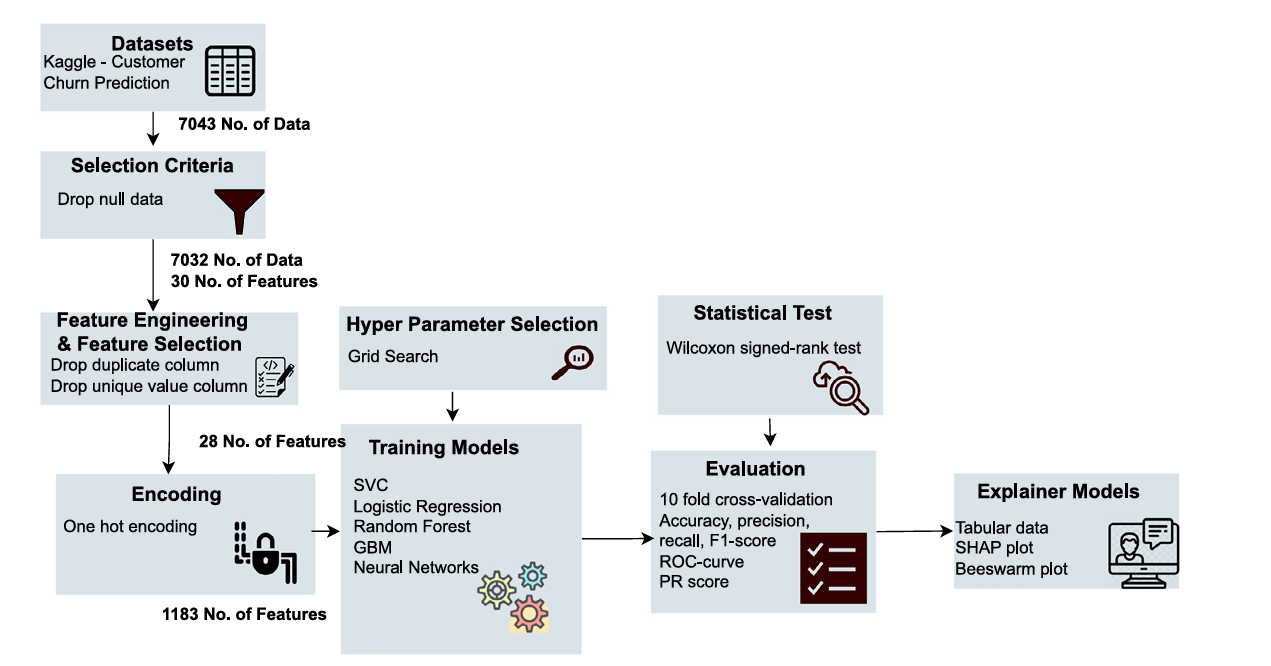

In [144]:
!pip install lazypredict

In [145]:
!pip install mlflow --quiet
!pip install pyngrok --quiet

In [146]:
!pip install lime

In [147]:
# Import libraries
import pandas as pd
import numpy as np
import mlflow
import plotly.express as px
from sklearn.metrics import confusion_matrix
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.offline as py # visualization
import pickle
import mlflow.sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold
from imblearn.combine import SMOTEENN
import shap
import lime
import lime.lime_tabular
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [148]:
# Load datasets
data_80 = pd.read_csv('/content/churn-bigml-20.csv')
data_20 = pd.read_csv('/content/churn-bigml-80.csv')

# Concatenate datasets by rows
data = pd.concat([data_80, data_20], axis=0, ignore_index=True)


In [149]:
data.shape

(3333, 20)

In [150]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.50,97,31.37,351.60,80,29.89,215.80,90,9.71,8.70,4,2.35,1,False
1,IN,65,415,No,No,0,129.10,137,21.95,228.50,83,19.42,208.80,111,9.40,12.70,6,3.43,4,True
2,NY,161,415,No,No,0,332.90,67,56.59,317.80,97,27.01,160.60,128,7.23,5.40,9,1.46,4,True
3,SC,111,415,No,No,0,110.40,103,18.77,137.30,102,11.67,189.60,105,8.53,7.70,6,2.08,2,False
4,HI,49,510,No,No,0,119.30,117,20.28,215.10,109,18.28,178.70,90,8.04,11.10,1,3.00,1,False


In [151]:
data.columns.astype(str)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [153]:
missing_values = data.isnull().sum()
missing_values

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [154]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [155]:
sum(data.duplicated())

0

In [156]:
# Counting unique values for each column in the DataFrame
unique_counts = data.nunique()

print(unique_counts)

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64


In [157]:
# Categorical Columns
categorical_cols = ['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn']

# Continuous Columns
continuous_cols = [col for col in data.columns if col not in categorical_cols]

### Univariate analysis

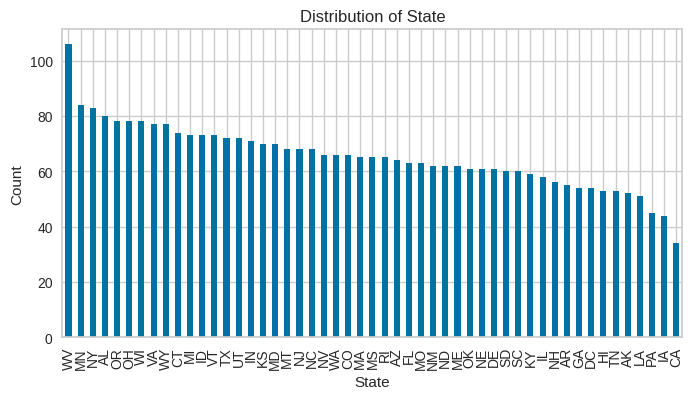

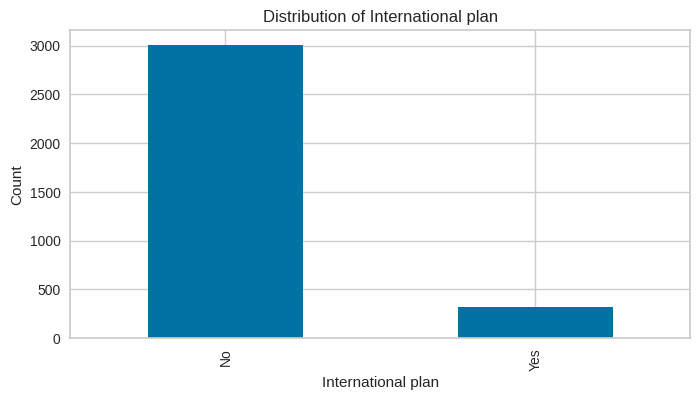

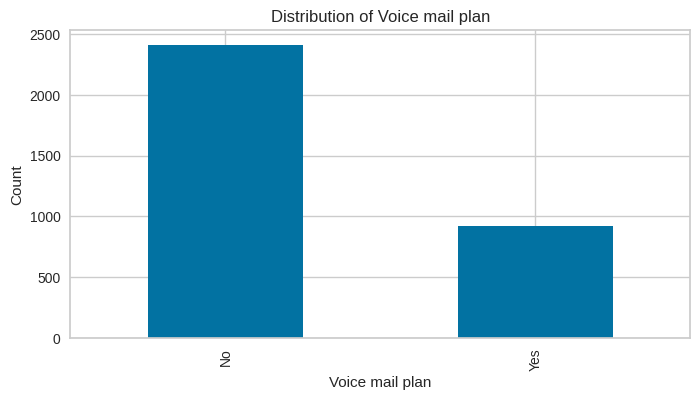

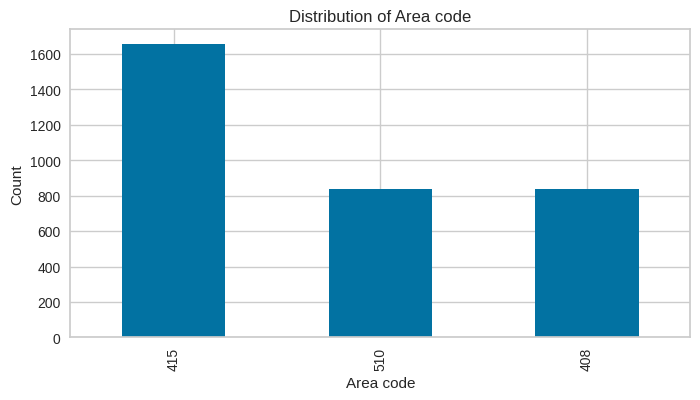

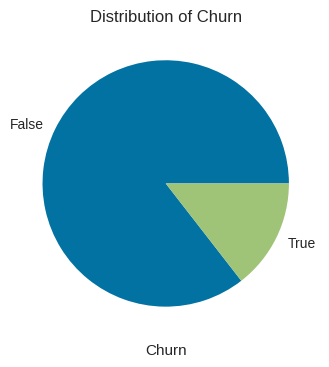

In [158]:
# Plotting categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar' if col != 'Churn' else 'pie')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count' if col != 'Churn' else '')
    plt.xlabel(col)
    plt.show()

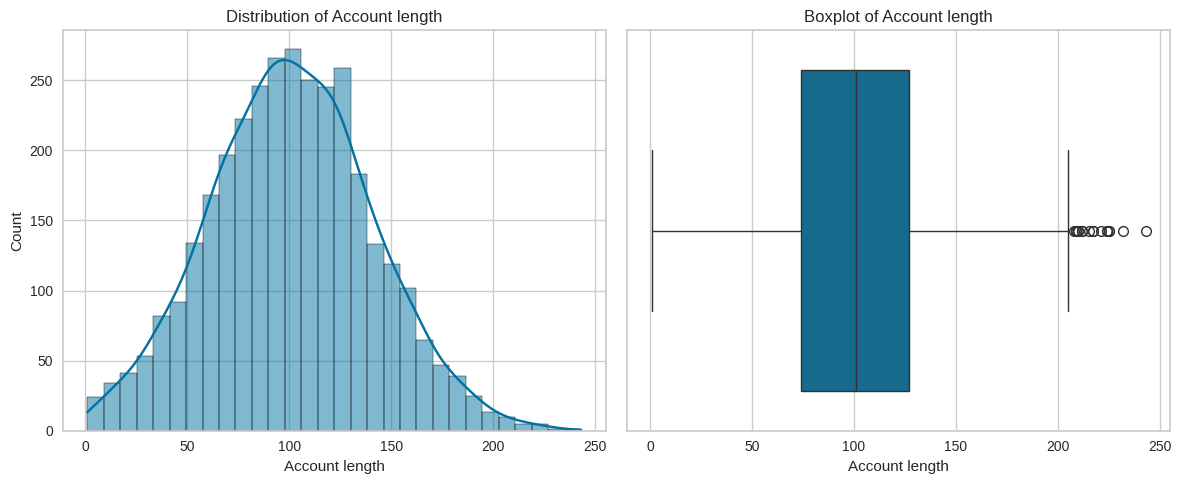

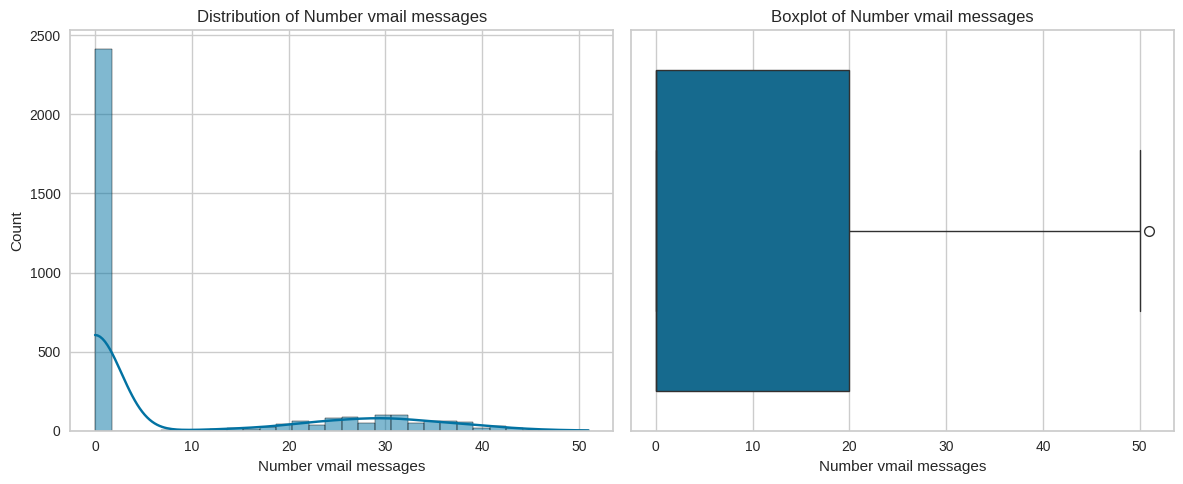

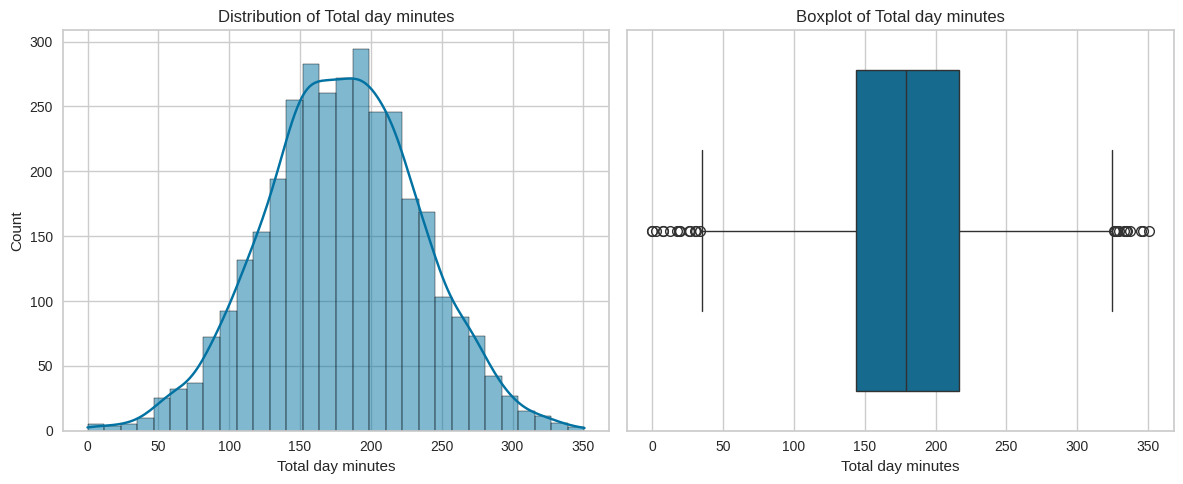

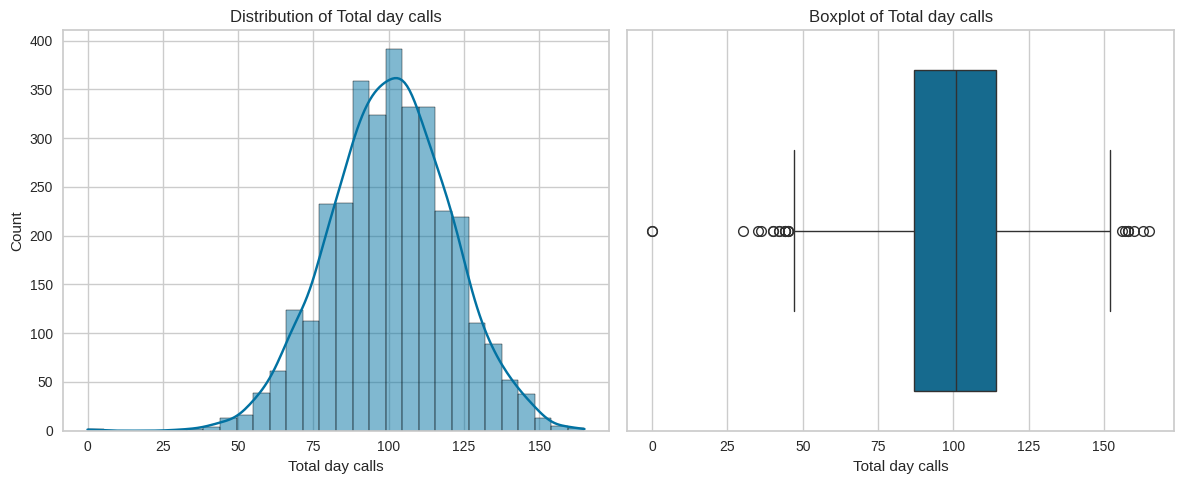

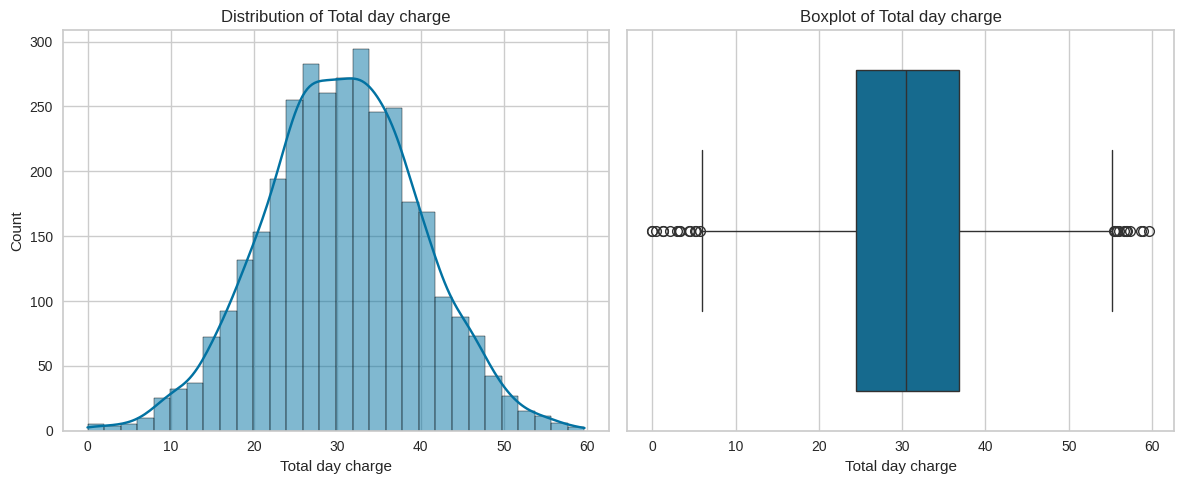

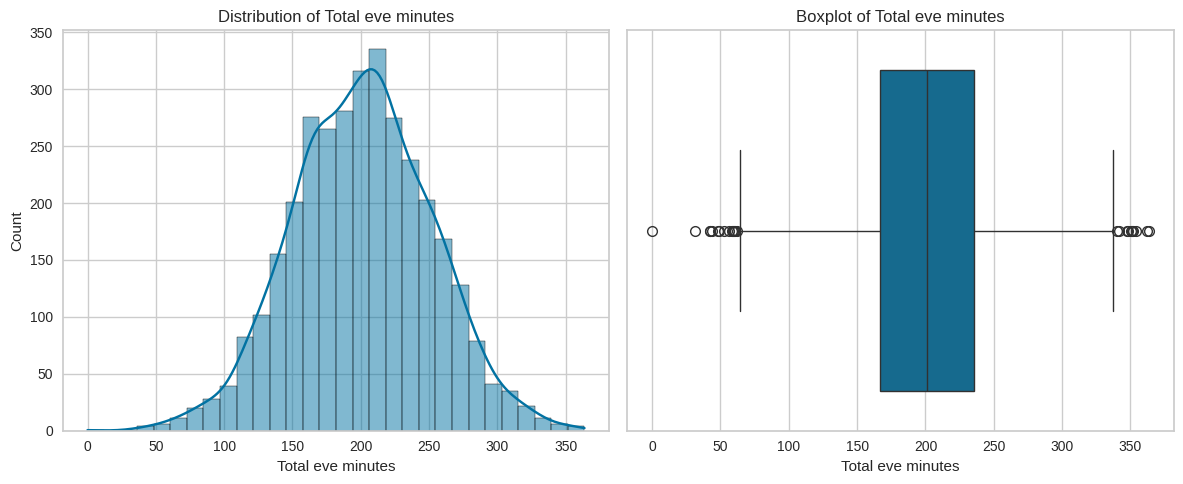

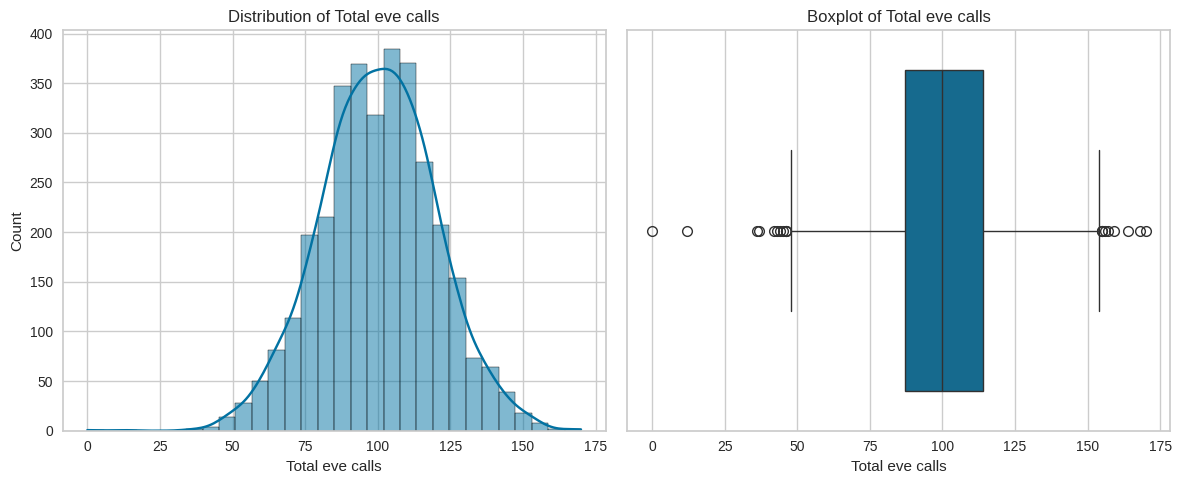

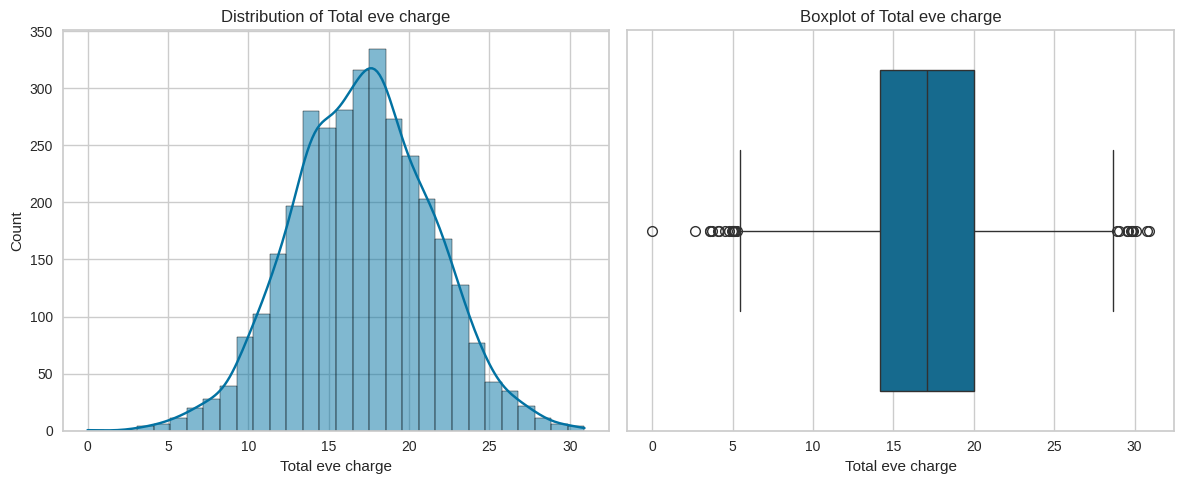

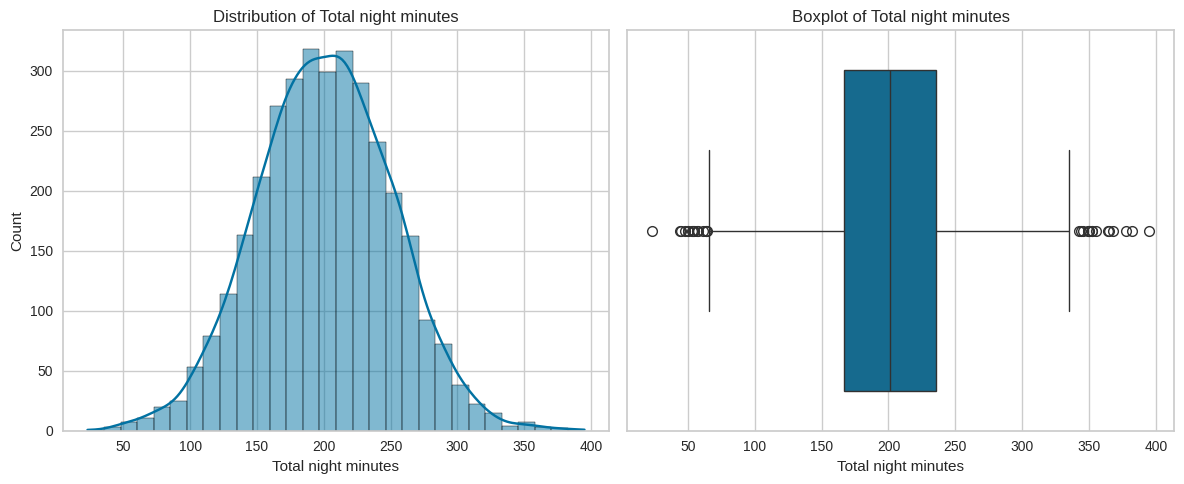

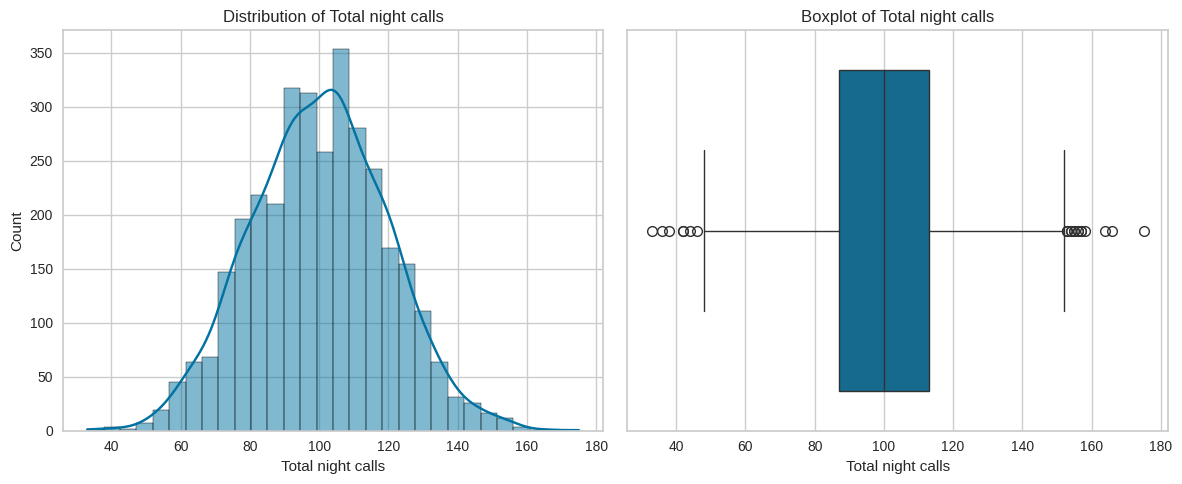

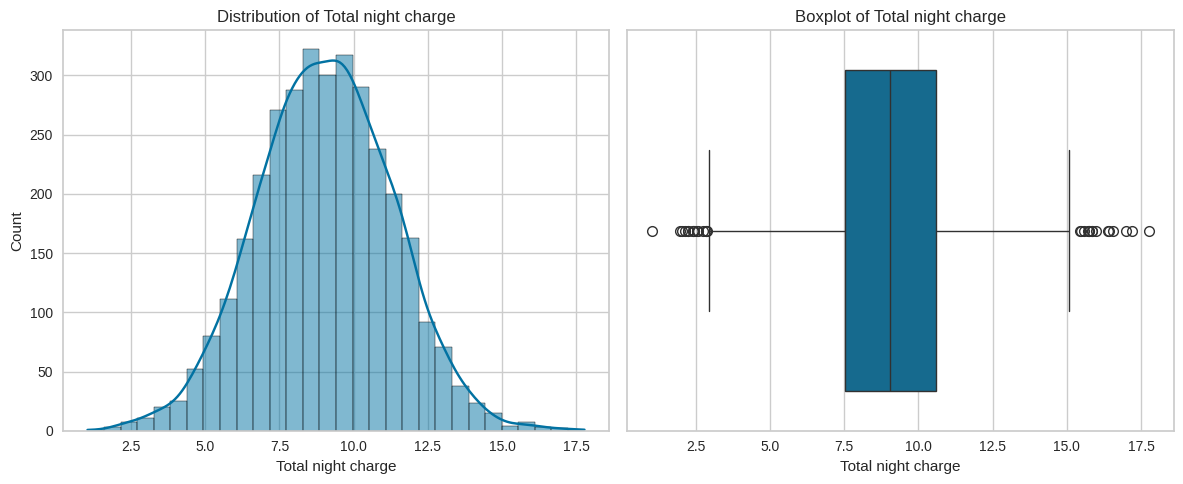

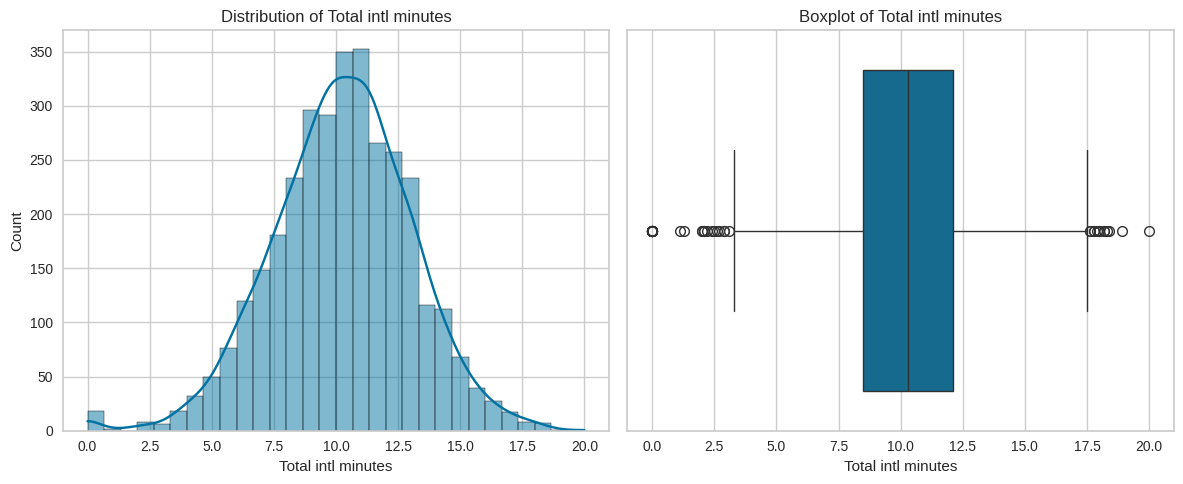

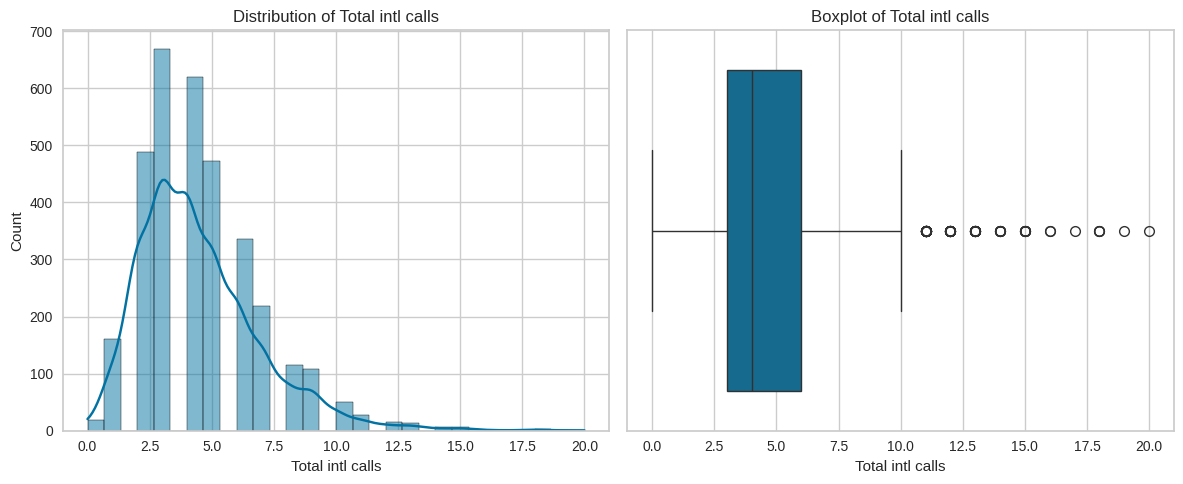

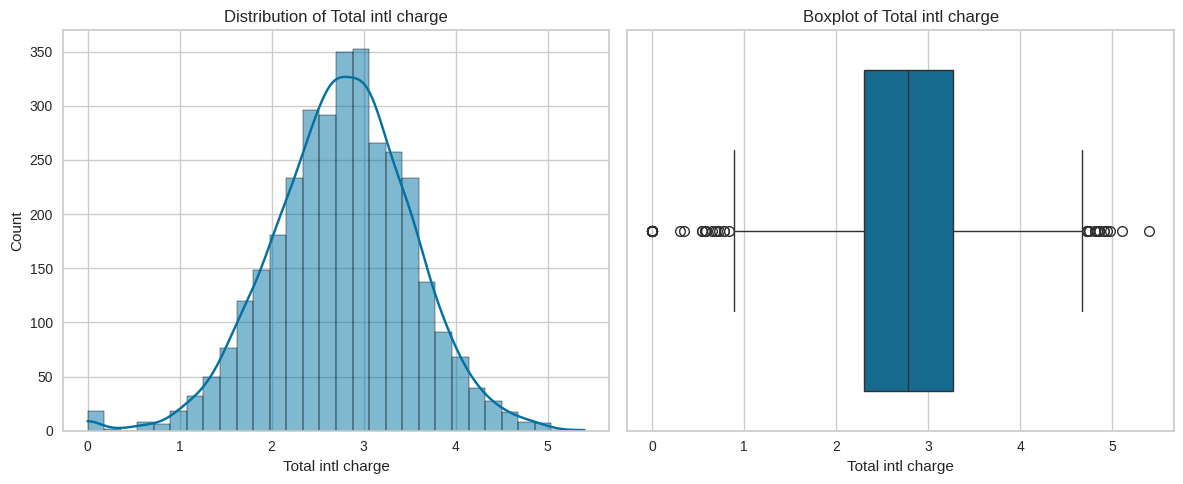

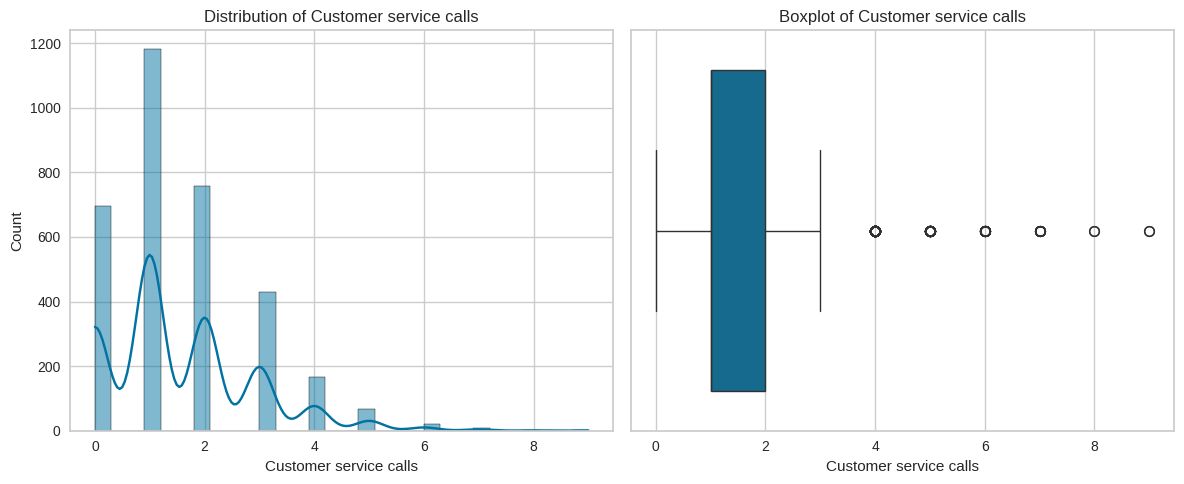

In [159]:

# Plotting continuous columns
for col in continuous_cols:
    plt.figure(figsize=(12, 5))

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### Bivariate analysis

In [160]:
import plotly.express as px

# Calculate total charges and store it in a separate variable for EDA
total_charges = (
    data['Total day charge'] +
    data['Total eve charge'] +
    data['Total night charge'] +
    data['Total intl charge']
)

# Create a DataFrame for EDA with churn and total charges
eda_df = pd.DataFrame({
    'Total Charges': total_charges,
    'Churn': data['Churn']
})

# Plot the scatter plot with Plotly
fig = px.scatter(
    eda_df,
    x='Total Charges',
    y=eda_df.index,
    color='Churn',
    color_discrete_map={0: 'blue', 1: 'red'},  # Non-churn: blue, Churn: red
    labels={'y': 'Customer Index'},
    title='Scatter Plot of Total Charges with Churn Status'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Total Charges",
    yaxis_title="Customer Index",
    legend_title="Churn Status",
    template="plotly_white"
)

# Show the plot
fig.show()


In [161]:
# Aggregate churn and non-churn counts per state
state_churn_data = data.groupby(['State', 'Churn']).size().unstack(fill_value=0).reset_index()
state_churn_data.columns = ['State', 'Non_Churn', 'Churn']

# Prepare the map data
state_churn_data['Total'] = state_churn_data['Churn'] + state_churn_data['Non_Churn']

# Plot a choropleth map
fig = px.choropleth(
    state_churn_data,
    locations='State',
    locationmode='USA-states',
    color='Churn',  # Color based on churn count
    hover_data=['State', 'Churn', 'Non_Churn', 'Total'],
    scope='usa',
    color_continuous_scale='Reds',
    title="Churn and Non-Churn Counts Per State"
)

# Show the map
fig.show()

In [162]:
# Aggregate the total customer service calls per state
state_calls_data = data.groupby('State')['Customer service calls'].sum().reset_index()

# Plot a choropleth map
fig = px.choropleth(
    state_calls_data,
    locations='State',
    locationmode='USA-states',
    color='Customer service calls',  # Color based on total calls
    hover_data=['State', 'Customer service calls'],
    scope='usa',
    color_continuous_scale='Blues',
    title="Customer Service Calls Per State"
)

# Show the map
fig.show()

In [163]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


In [164]:
# Churn vs Total day minutes
fig_day_minutes = px.box(data_frame=data, x='Churn', y='Total day minutes', title="Total Day Minutes vs Churn")
fig_day_minutes.show()

# Churn vs Total eve minutes
fig_eve_minutes = px.box(data_frame=data, x='Churn', y='Total eve minutes', title="Total Evening Minutes vs Churn")
fig_eve_minutes.show()

# Churn vs International plan
fig_international_plan = px.histogram(data_frame=data, x='International plan', color='Churn', barmode='group', title="International Plan vs Churn")
fig_international_plan.show()

# Churn vs Customer service calls
fig_service_calls = px.box(data_frame=data, x='Churn', y='Customer service calls', title="Customer Service Calls vs Churn")
fig_service_calls.show()

In [165]:
data['State'].value_counts()

,count
State,
WV,106
MN,84
NY,83
AL,80
OR,78
OH,78
WI,78
VA,77
WY,77


In [166]:
import pandas as pd
import numpy as np

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate IQR for numeric data
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in numeric data
outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))

# Replace outliers with the mean of the respective column
for column in numeric_data.columns:
    mean_value = numeric_data[column].median()
    numeric_data.loc[outliers[column], column] = mean_value

# Replace the original numeric columns in the DataFrame with the imputed data
data[numeric_data.columns] = numeric_data


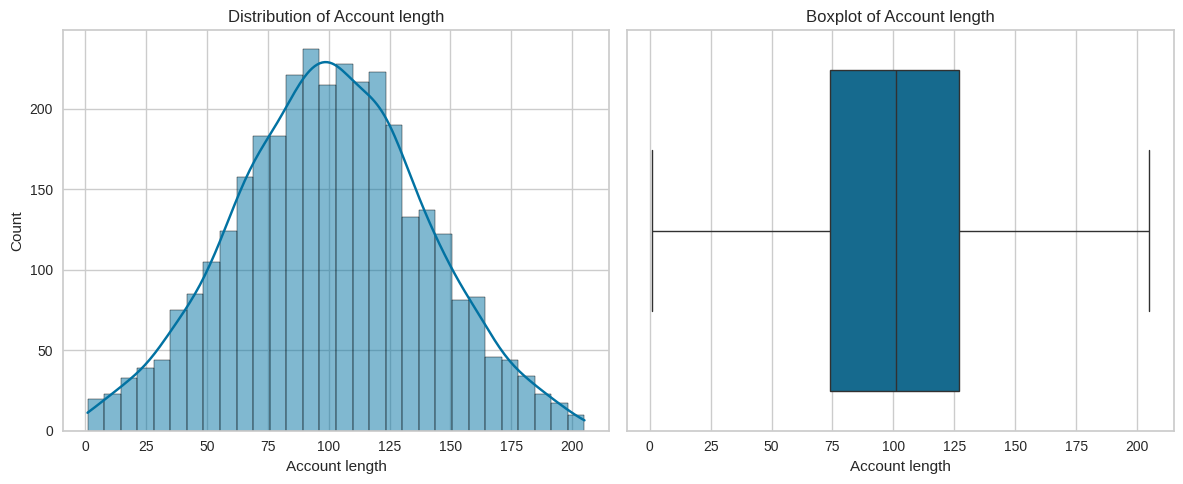

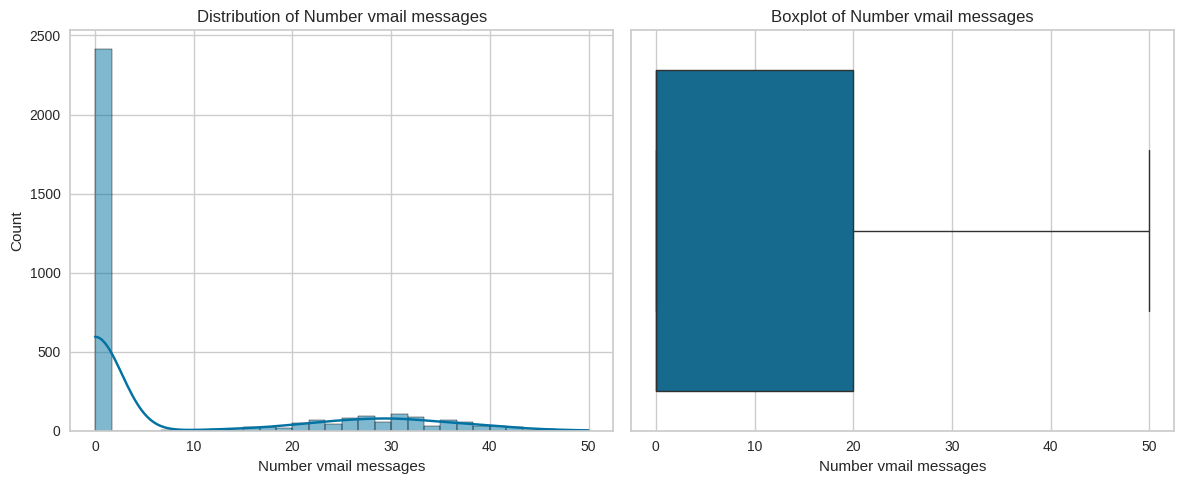

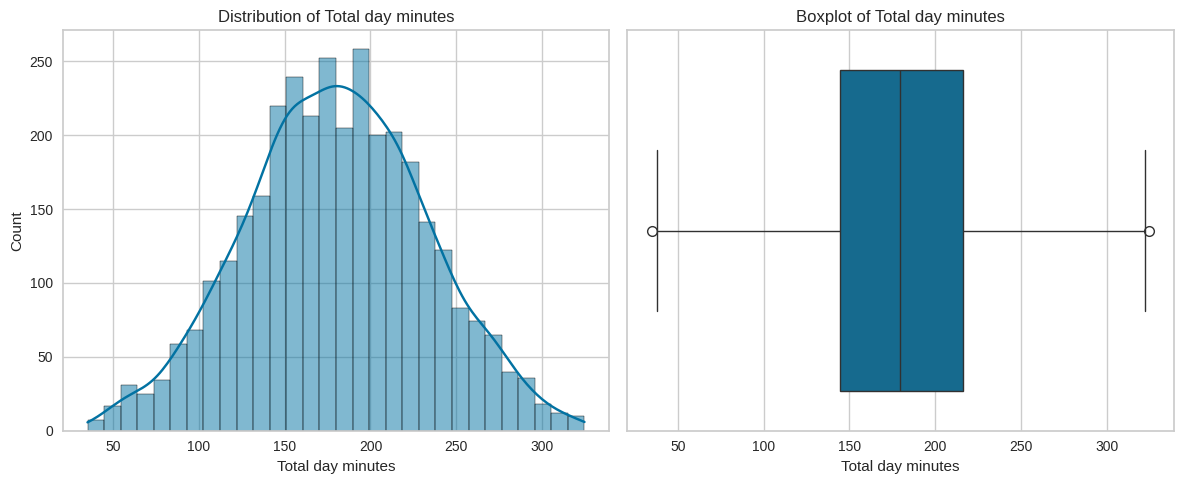

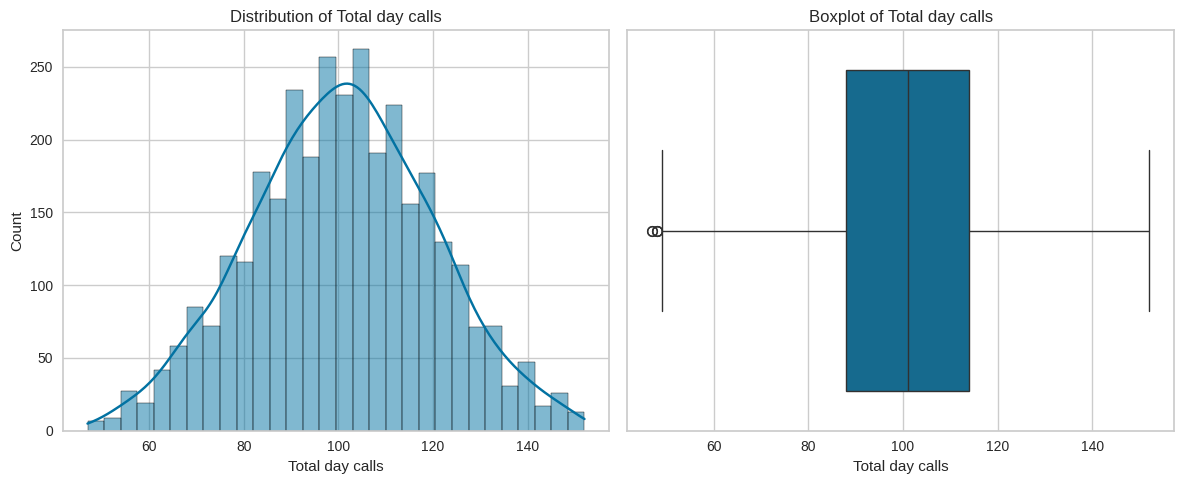

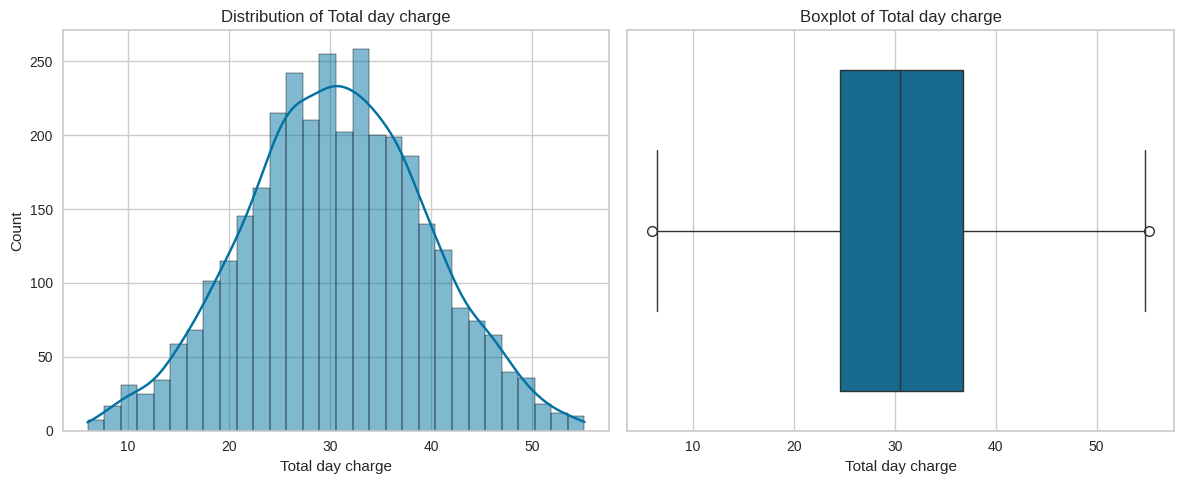

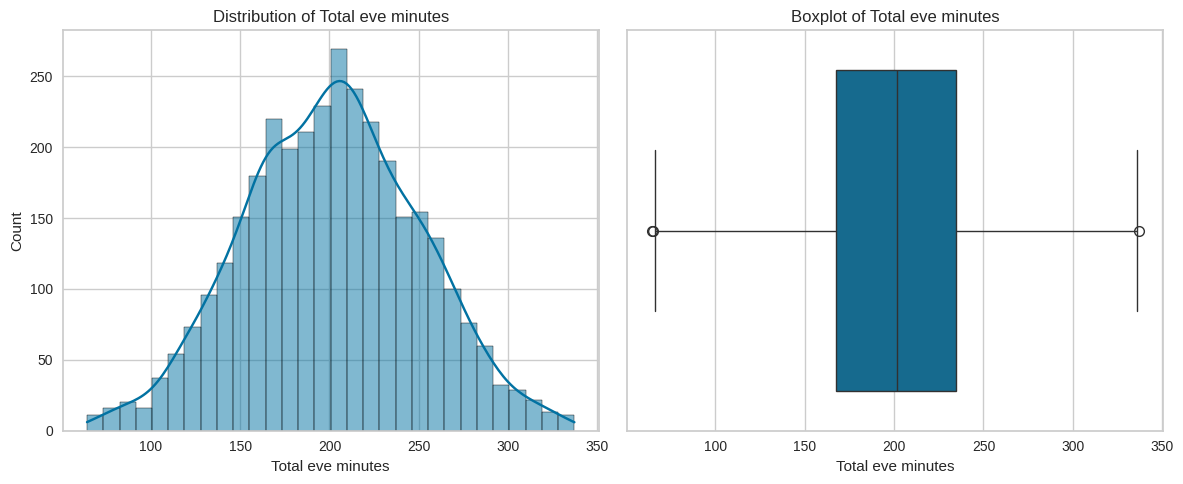

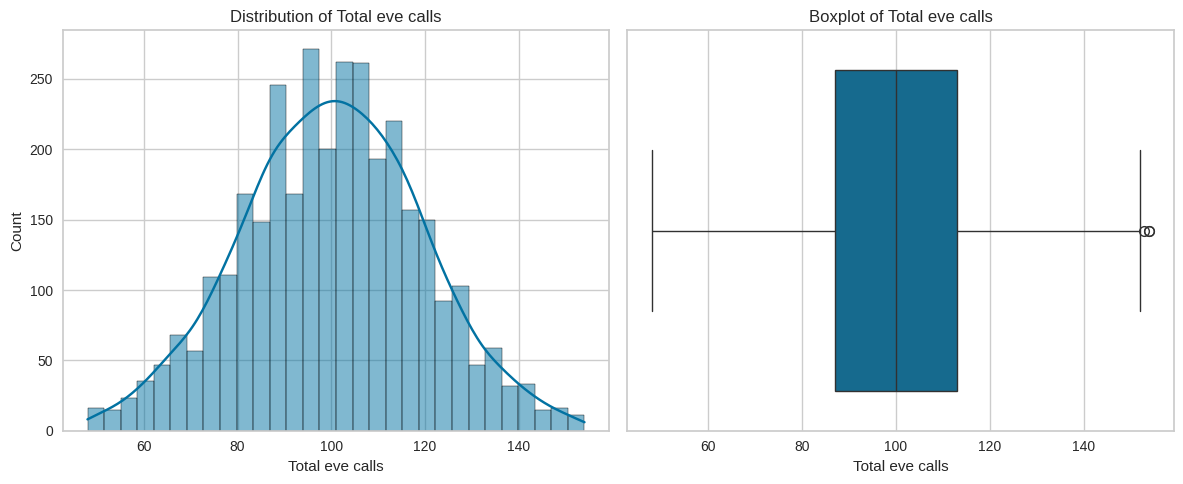

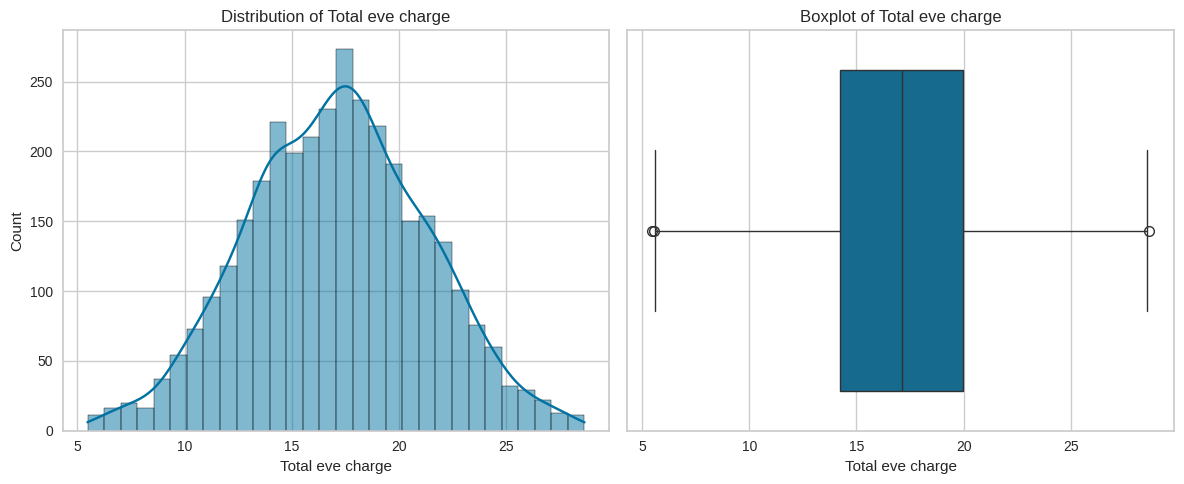

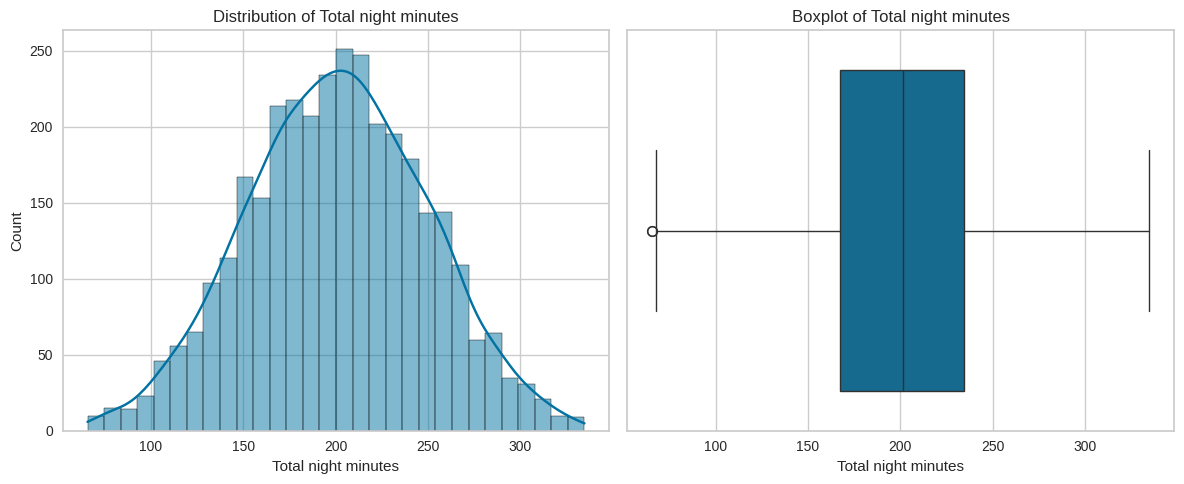

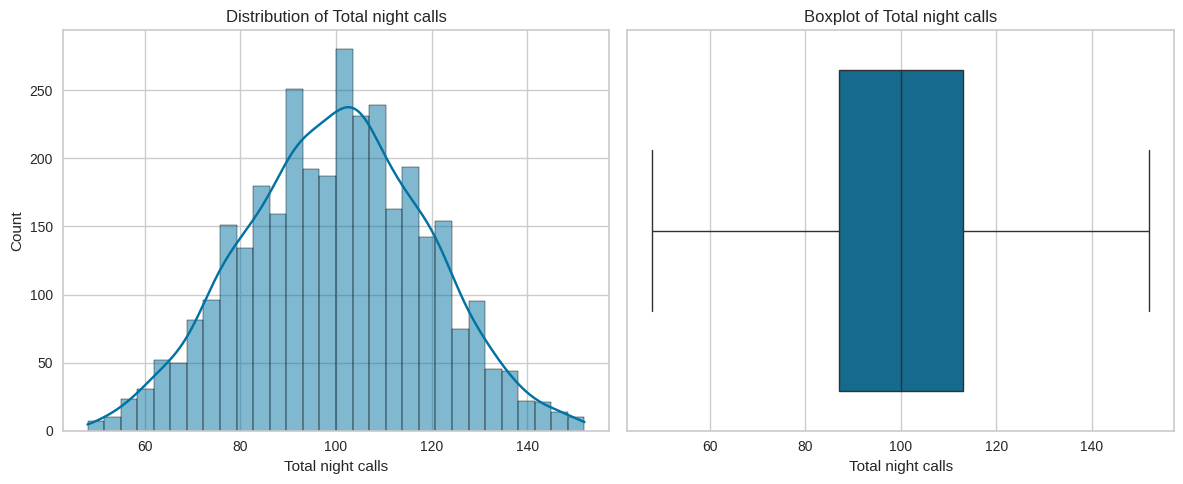

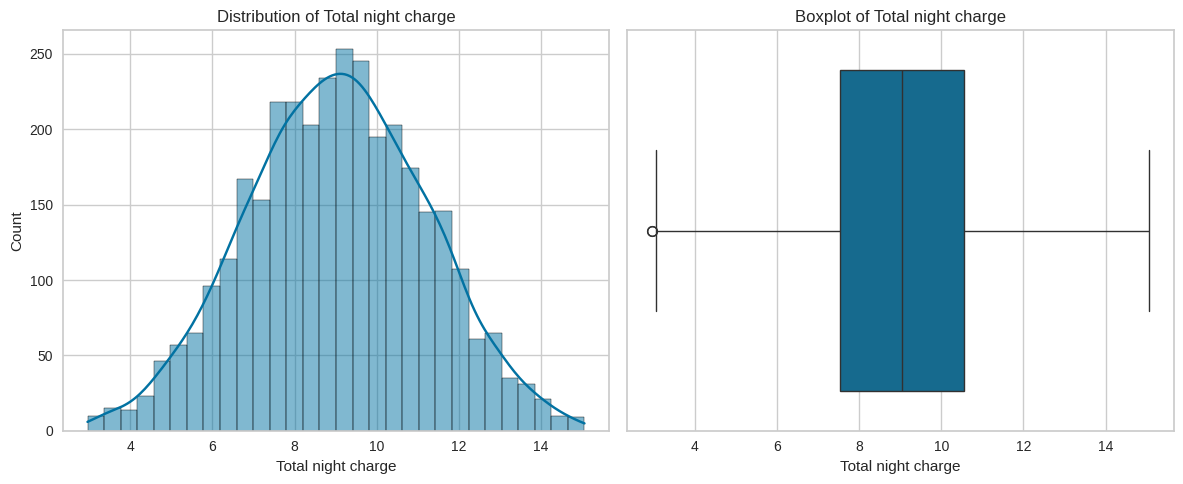

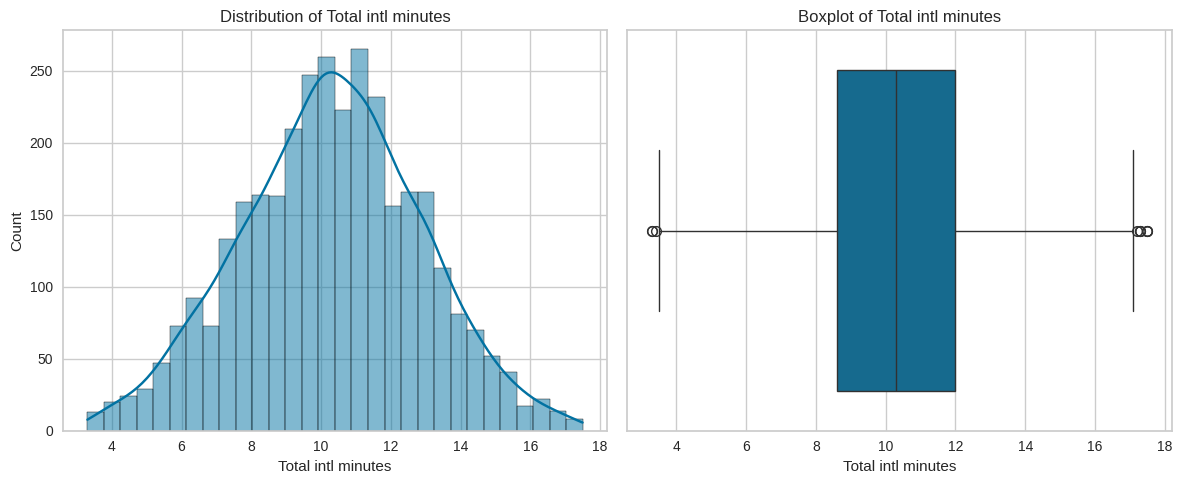

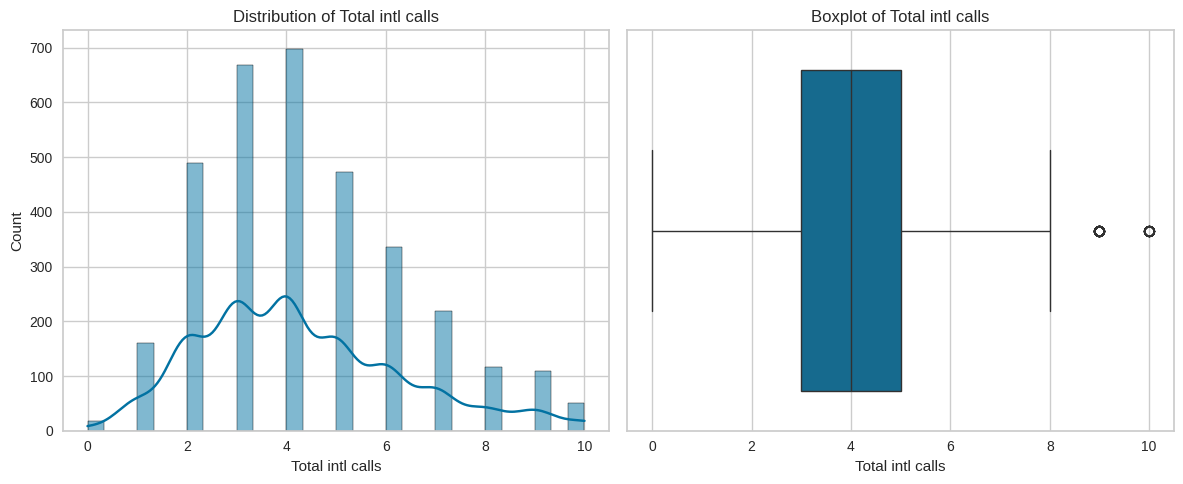

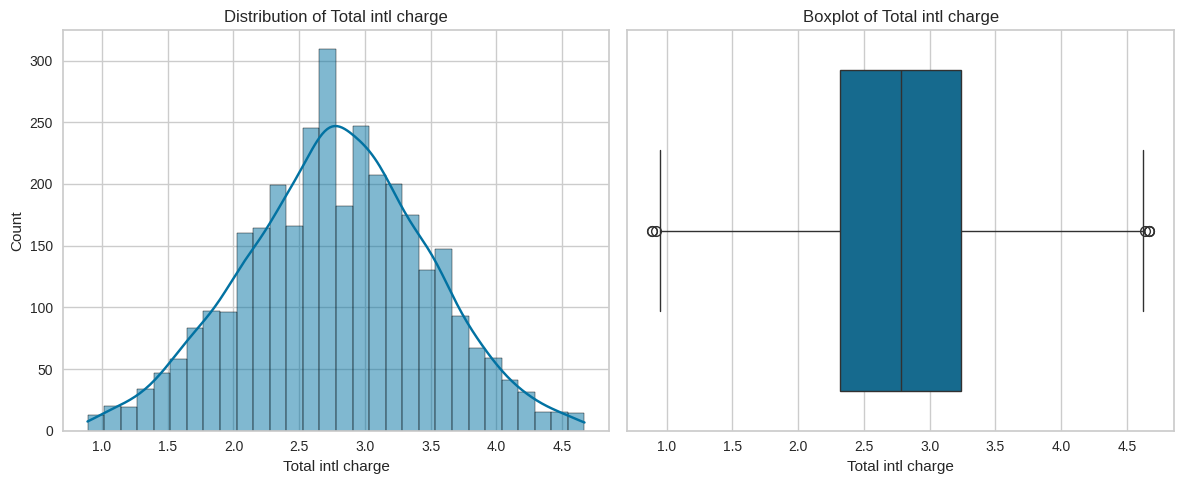

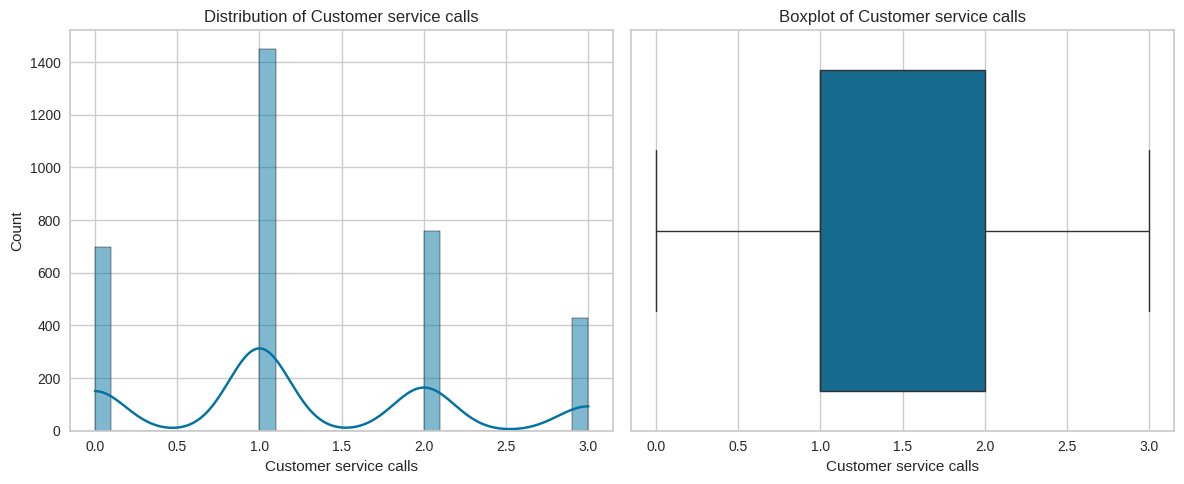

In [167]:

# Plotting continuous columns
for col in continuous_cols:
    plt.figure(figsize=(12, 5))

    # Distribution Plot
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [168]:
# Comprehensive mapping of U.S. states to regions
region_mapping = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast',
    'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest',
    'MI': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest',
    'ND': 'Midwest', 'OH': 'Midwest', 'SD': 'Midwest', 'WI': 'Midwest',

    # South
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South',
    'OK': 'South', 'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South',
    'WV': 'South', 'DC': 'South',

    # West
    'AK': 'West', 'AZ': 'West', 'CA': 'West', 'CO': 'West', 'HI': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'OR': 'West',
    'UT': 'West', 'WA': 'West', 'WY': 'West'
}


In [169]:
# Map states to regions
data['Region'] = data['State'].map(region_mapping)

In [170]:
data.drop(columns='State', inplace=True)

In [171]:
# Apply one-hot encoding to selected columns
data_encoded = pd.get_dummies(data, drop_first=True)

# Convert boolean (or binary) columns to integers
data = data_encoded.astype(int)

# Display the resulting DataFrame
data.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes,Region_Northeast,Region_South,Region_West
0,117,408,0,184,97,31,201,80,17,215,...,8,4,2,1,0,0,0,0,1,0
1,65,415,0,129,137,21,228,83,19,208,...,12,6,3,1,1,0,0,0,0,0
2,161,415,0,179,67,30,317,97,27,160,...,5,9,1,1,1,0,0,1,0,0
3,111,415,0,110,103,18,137,102,11,189,...,7,6,2,2,0,0,0,0,1,0
4,49,510,0,119,117,20,215,109,18,178,...,11,1,3,1,0,0,0,0,0,1


In [172]:
data.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_Yes,Voice mail plan_Yes,Region_Northeast,Region_South,Region_West
0,117,408,0,184,97,31,201,80,17,215,...,8,4,2,1,0,0,0,0,1,0
1,65,415,0,129,137,21,228,83,19,208,...,12,6,3,1,1,0,0,0,0,0
2,161,415,0,179,67,30,317,97,27,160,...,5,9,1,1,1,0,0,1,0,0
3,111,415,0,110,103,18,137,102,11,189,...,7,6,2,2,0,0,0,0,1,0
4,49,510,0,119,117,20,215,109,18,178,...,11,1,3,1,0,0,0,0,0,1


In [173]:
data.shape

(3333, 22)

In [174]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x else 0)

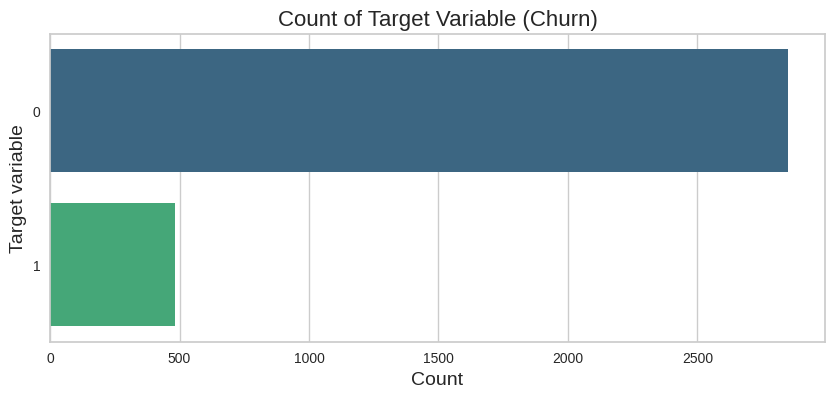

In [175]:
plt.figure(figsize=(10, 4))
churn_counts = data['Churn'].value_counts()

# Créer un bar chart horizontal
sns.barplot(y=churn_counts.index, x=churn_counts.values, palette='viridis', orient='h')

# Ajouter des titres et labels
plt.title("Count of Target Variable (Churn)", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Target variable", fontsize=14)

plt.show()

In [176]:
data.to_csv('cleaned_data.csv', index=False)


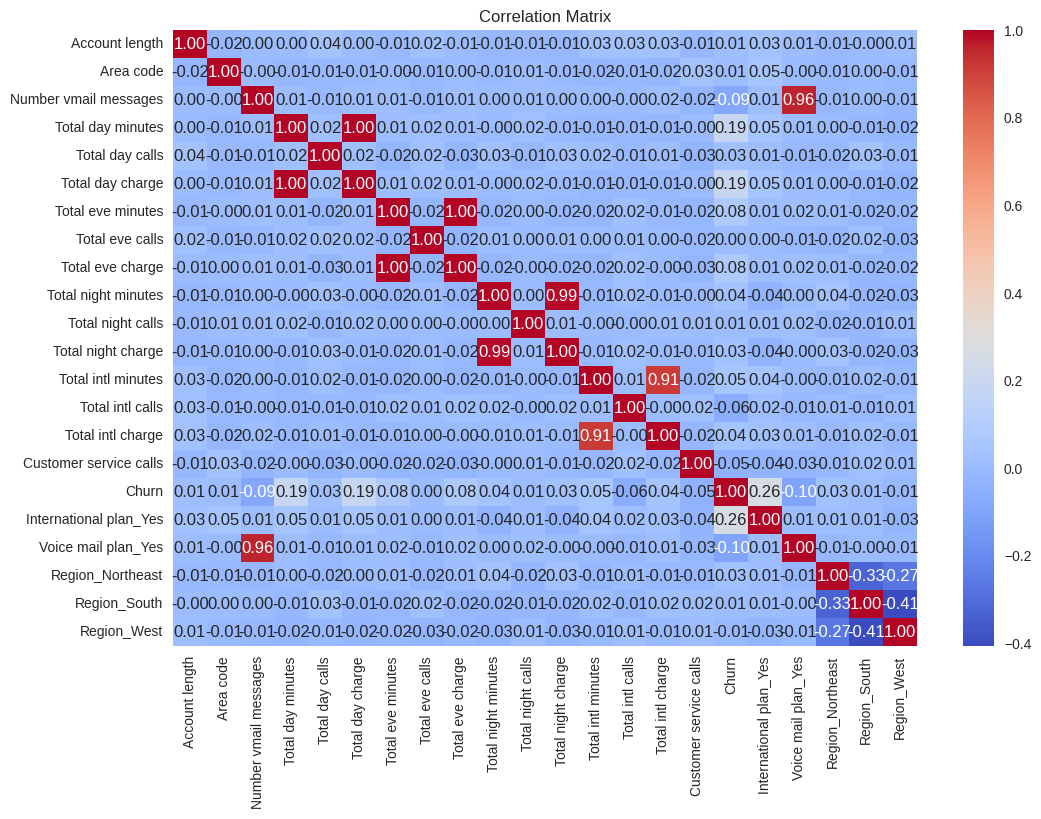

In [177]:
# Feature Correlation
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

• Strong correlation exists between tenure and total charges, means as tenure increases so does total charges.  
• Strong correlation exists between monthly charges and total charges as well.  
• Tenure and Contract duration seems to be strong factors in determining churn.  
• Among service types, phone service seems to be most popular.  
• CSP should investigate if customers receiving digital invoice have any concern with understanding the bill details.  
• Also, they should encourage customers to move to automated payment modes to improve customer experience.  
• Gender does not play an important role. However, CSPs should take care of the experience of senior citizens.

In [178]:
data.shape

(3333, 22)

In [179]:
# Splitting features and target
X = data.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = data['Churn']

!! the scaling makes the models overfit in the deployment

In [180]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#### Features Selection

2024/12/11 12:33:47 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '450f72b04e334a508788926b91f8d038', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/11 12:33:47 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/11 12:33:47 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


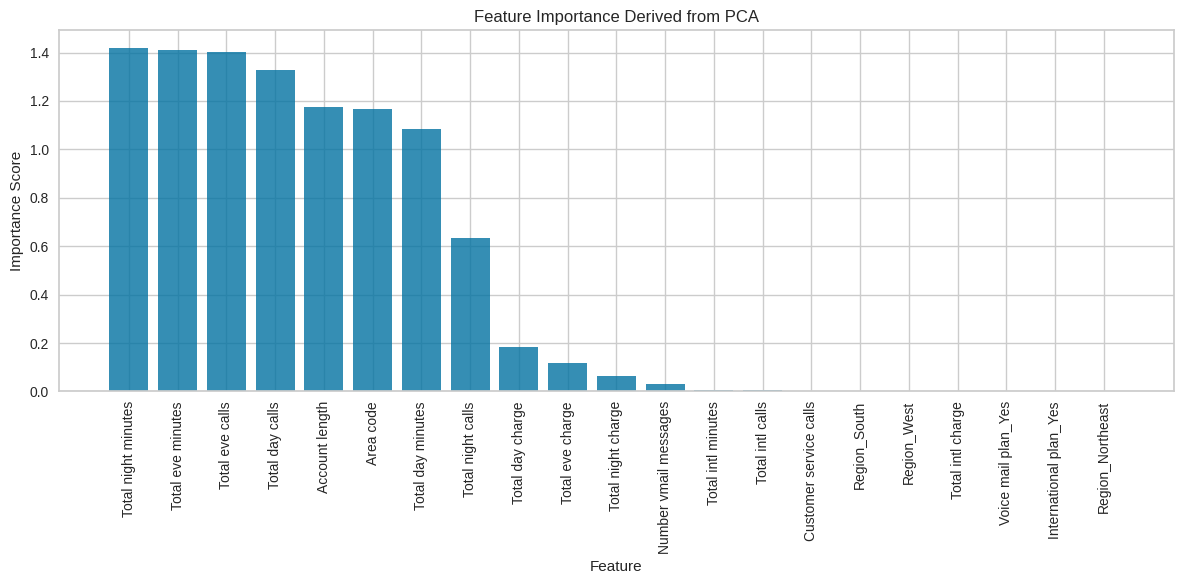

In [181]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Features excluding target column
features = [
    'Account length', 'Area code', 'Number vmail messages',
    'Total day minutes', 'Total day calls', 'Total day charge',
    'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge',
    'Customer service calls', 'International plan_Yes',
    'Voice mail plan_Yes', 'Region_Northeast', 'Region_South',
    'Region_West'
]
X_features = X[features]

# Initialize PCA (retain components covering 95% variance)
pca = PCA(n_components=0.95)
pca.fit(X_features)

# Get the loading matrix (contribution of each feature to the principal components)
loading_matrix = pca.components_

# Sum of absolute loadings for each original feature
feature_importance = np.sum(np.abs(loading_matrix), axis=0)

# Rank features by importance
ranked_features = np.argsort(feature_importance)[::-1]  # Indices of features sorted by importance (descending)
ranked_feature_names = [features[i] for i in ranked_features]

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[ranked_features], align='center', alpha=0.8)
plt.xticks(range(len(feature_importance)), ranked_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance Derived from PCA")
plt.tight_layout()
plt.show()


The dataset isn't too large and interpretability is critical: Keep all features for now and rely on your downstream modeling or analysis steps to evaluate their utility.

In [182]:
"""import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_scaled is your input data (preprocessed)
X_pca = PCA().fit(X)

# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(X_pca.explained_variance_ratio_) + 1),
         np.cumsum(X_pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Elbow Plot of Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()"""


"import matplotlib.pyplot as plt\nfrom sklearn.decomposition import PCA\n\n# Assuming X_scaled is your input data (preprocessed)\nX_pca = PCA().fit(X)\n\n# Plotting the explained variance ratio\nplt.figure(figsize=(8, 6))\nplt.plot(range(1, len(X_pca.explained_variance_ratio_) + 1),\n         np.cumsum(X_pca.explained_variance_ratio_), marker='o', linestyle='--')\nplt.title('Elbow Plot of Cumulative Explained Variance')\nplt.xlabel('Number of Components')\nplt.ylabel('Cumulative Explained Variance')\nplt.grid(True)\nplt.show()"

In [183]:
#pca = PCA(n_components=0.95)  # Retain 95% variance
#X_pca = pca.fit_transform(X_scaled)

In [184]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to handle class imbalance
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Display the new shape of the data
print(f"Original dataset shape: {X.shape, y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape, y_resampled.shape}")


2024/12/11 12:33:54 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5bd4ef8c21204ccab54ecf0bb0e6fb4c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/11 12:33:54 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/11 12:33:54 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/12/11 12:33:54 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/12/11 12:33:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signatu

Original dataset shape: ((3333, 21), (3333,))
Resampled dataset shape: ((4279, 21), (4279,))


In [185]:
y_resampled.value_counts()

,count
Churn,
1,2677
0,1602


In [186]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [187]:
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import roc_auc_score

# Initialize the LazyRegressor
Lazy_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=roc_auc_score)

# Fit the LazyRegressor and get predictions
models, predictions = Lazy_classifier.fit(X_train, X_test, y_train, y_test)

 55%|█████▍    | 17/31 [01:44<01:33,  6.65s/it]2024/12/11 12:35:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '26c89bc02486465cb355d40be59a8ce6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/11 12:35:49 WARNING mlflow.sklearn.utils: RocCurveDisplay.from_estimator failed. The artifact training_roc_curve will not be recorded. Artifact error: Pipeline has none of the following attributes: predict_proba, decision_function.
2024/12/11 12:35:49 WARNING mlflow.sklearn.utils: PrecisionRecallDisplay.from_estimator failed. The artifact training_precision_recall_curve will not be recorded. Artifact error: Pipeline has none of the following attributes: predict_proba, decision_function.
 97%|█████████▋| 30/31 [02:54<00:04,  4.00s/it]2024/12/11 12:36:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '77ef9f3e1cff4fc28d382ca7fa4ef08c', which will tr

[LightGBM] [Info] Number of positive: 2174, number of negative: 1249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 3423, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635115 -> initscore=0.554226
[LightGBM] [Info] Start training from score 0.554226


100%|██████████| 31/31 [03:01<00:00,  5.87s/it]


In [188]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,roc_auc_score,Time Taken
Model,,,,,,
XGBClassifier,0.95,0.94,0.94,0.95,0.94,5.67
RandomForestClassifier,0.94,0.93,0.93,0.94,0.93,7.91
LGBMClassifier,0.94,0.93,0.93,0.94,0.93,7.59
ExtraTreesClassifier,0.94,0.93,0.93,0.94,0.93,7.61
BaggingClassifier,0.91,0.90,0.90,0.91,0.90,5.60
SVC,0.90,0.90,0.90,0.90,0.90,8.42
LabelPropagation,0.90,0.88,0.88,0.89,0.88,9.46
LabelSpreading,0.90,0.88,0.88,0.89,0.88,10.77
QuadraticDiscriminantAnalysis,0.88,0.88,0.88,0.88,0.88,6.23


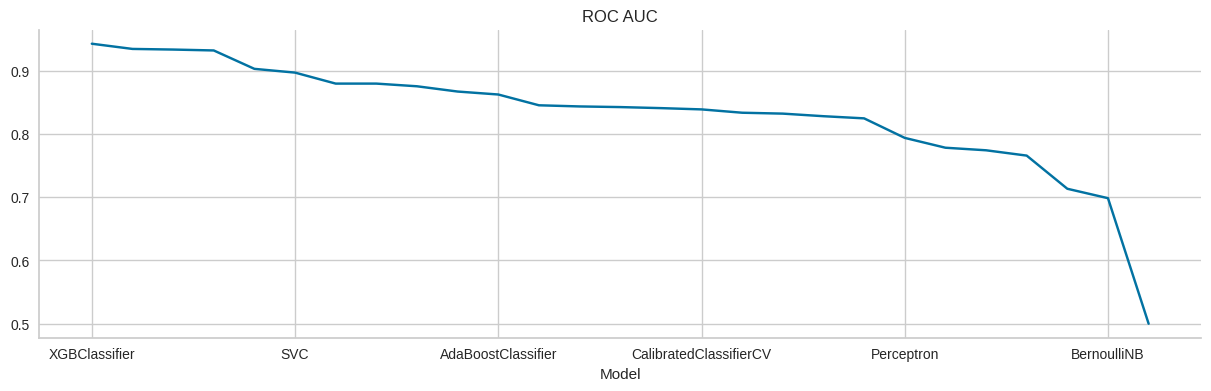

In [189]:
# @title ROC AUC

from matplotlib import pyplot as plt
models['ROC AUC'].plot(kind='line', figsize=(15, 4), title='ROC AUC')
plt.gca().spines[['top', 'right']].set_visible(False)

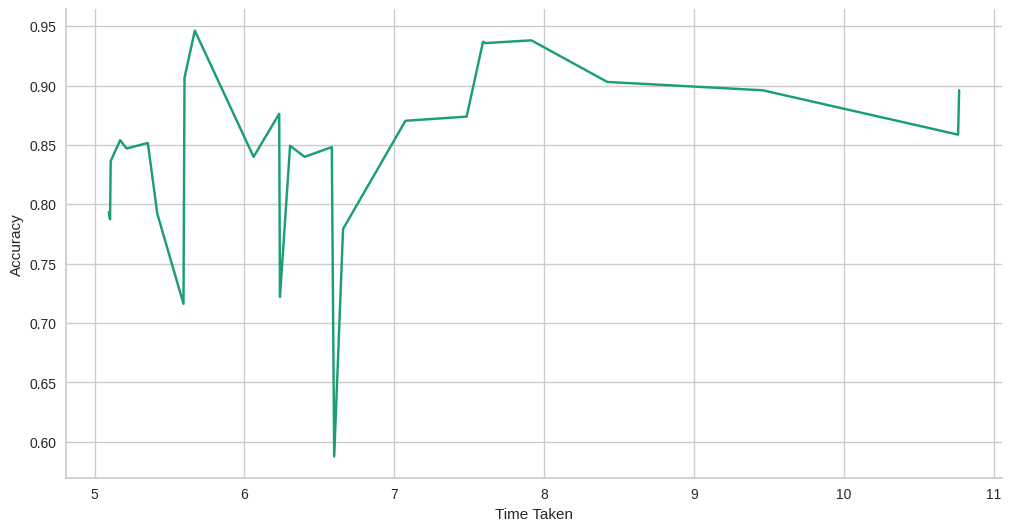

In [190]:
# @title Time Taken vs Accuracy

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Taken']
  ys = series['Accuracy']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = models.sort_values('Time Taken', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Taken')
_ = plt.ylabel('Accuracy')

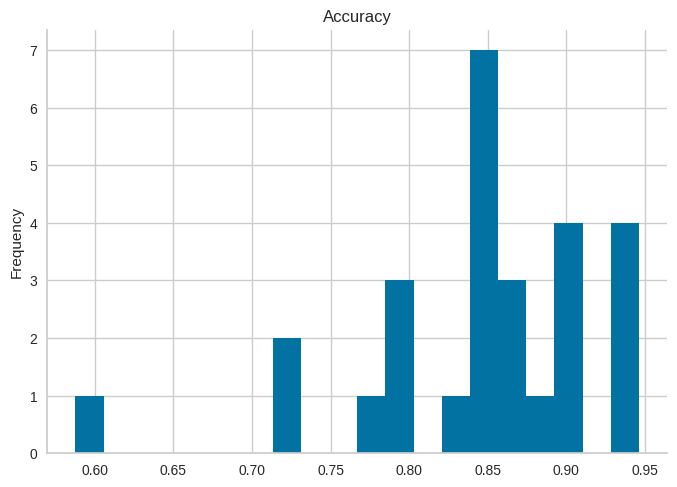

In [191]:
# @title Accuracy

from matplotlib import pyplot as plt
models['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### BaseLine Models

In [192]:
def rf_Feature_importance(rf):
  # Get feature importances
  feature_importance = rf.feature_importances_

  # Create a DataFrame for better visualization
  feature_importance_df = pd.DataFrame({
      'Feature': X.columns,
      'Importance': feature_importance
  }).sort_values(by='Importance', ascending=False)

  # Display the most important features
  print(feature_importance_df)

  # Visualize feature importance
  plt.figure(figsize=(12, 6))
  plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center', alpha=0.8)
  plt.xticks(rotation=90)
  plt.xlabel("Feature")
  plt.ylabel("Importance Score")
  plt.title("Feature Importance Derived from Random Forest")
  plt.tight_layout()
  plt.show()

In [193]:
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier

# Adding the new classifiers to the models dictionary
models = {
    "SVC": SVC(probability=True),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "NeuralNetwork": MLPClassifier(max_iter=1000),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "ExtraTrees": ExtraTreesClassifier(),
    "LGBM": LGBMClassifier()
}


In [194]:
# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Class 0)": class_report['0']['precision'],
        "Precision (Class 1)": class_report['1']['precision'],
        "Recall (Class 0)": class_report['0']['recall'],
        "Recall (Class 1)": class_report['1']['recall'],
        "F1-Score (Class 0)": class_report['0']['f1-score'],
        "F1-Score (Class 1)": class_report['1']['f1-score']
    }

2024/12/11 12:37:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f4befb0ab41b45acbafeee394f93fb6a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Training SVC...


2024/12/11 12:37:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '975ea0ff0d464e8197b17d03de54e8ee', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Training LogisticRegression...


2024/12/11 12:37:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '47d34256455b40c192c9fa2ba5ae1bfe', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Training RandomForest...
                   Feature  Importance
3        Total day minutes        0.12
5         Total day charge        0.10
6        Total eve minutes        0.07
9      Total night minutes        0.06
15  Customer service calls        0.06
0           Account length        0.05
8         Total eve charge        0.05
20             Region_West        0.05
7          Total eve calls        0.05
4          Total day calls        0.05
17     Voice mail plan_Yes        0.04
10       Total night calls        0.04
13        Total intl calls        0.04
2    Number vmail messages        0.04
1                Area code        0.03
11      Total night charge        0.03
19            Region_South        0.03
18        Region_Northeast        0.03
12      Total intl minutes        0.03
16  International plan_Yes        0.01
14       Total intl charge        0.01


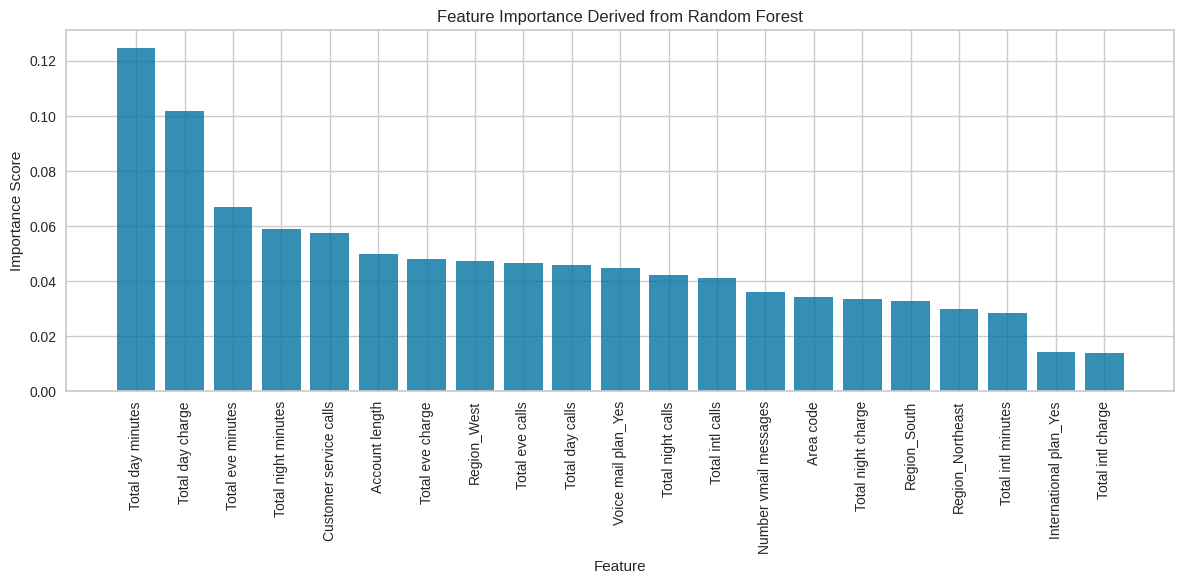

2024/12/11 12:37:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '09b60149a1f94f8a944098c2b5216513', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Training NeuralNetwork...


2024/12/11 12:37:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '85f3c2f3f1314ac1864edbcb26db926a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Training GradientBoosting...


2024/12/11 12:38:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3ab48d84e4454858ab3d2ec44bf02370', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Training AdaBoost...


2024/12/11 12:38:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '48ddcd68fe184b03b15764f452bcc787', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


Training XGBoost...


2024/12/11 12:38:23 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ba07f3baaf69421fa33c297e0afea49c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Training ExtraTrees...


2024/12/11 12:38:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '393827733a314c018d49fbf7a95674a1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current lightgbm workflow


Training LGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2174, number of negative: 1249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1340
[LightGBM] [Info] Number of data points in the train set: 3423, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635115 -> initscore=0.554226
[LightGBM] [Info] Start training from score 0.554226


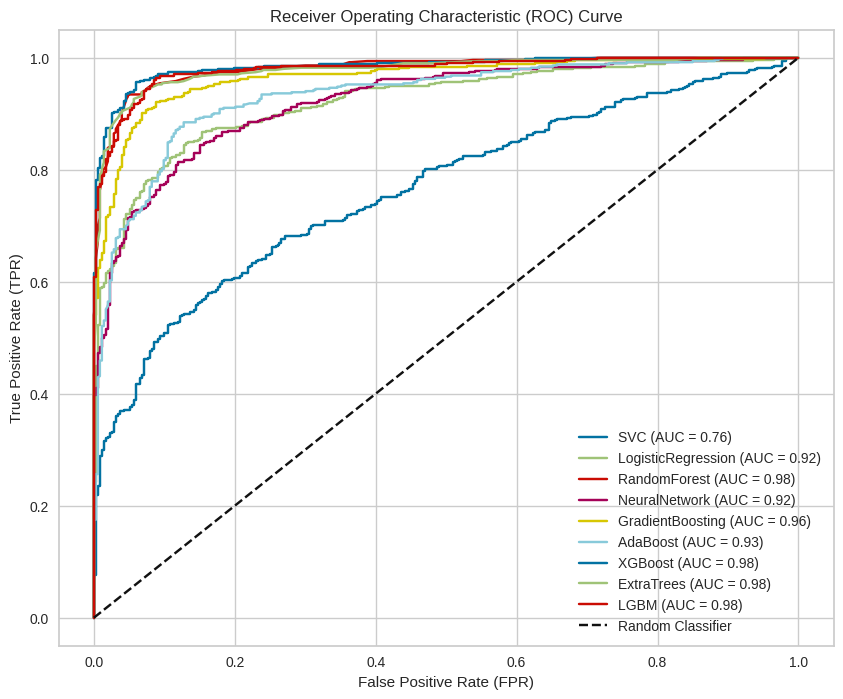

In [195]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import numpy as np

# Train and evaluate each model
baseline_results = {}
fpr_dict = {}  # Store false positive rates for all models
tpr_dict = {}  # Store true positive rates for all models
roc_auc_dict = {}  # Store AUC for all models

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    baseline_results[name] = evaluate_model(model, X_test, y_test)

    # Get model probabilities (predict_proba is used for AUC and ROC)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data and AUC
    fpr_dict[name] = fpr
    tpr_dict[name] = tpr
    roc_auc_dict[name] = roc_auc

    # If the model is RandomForest, evaluate feature importance
    if name == "RandomForest":
        rf_Feature_importance(model)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for name in models.keys():
    plt.plot(fpr_dict[name], tpr_dict[name], label=f'{name} (AUC = {roc_auc_dict[name]:.2f})')

# Plot random classifier (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Add labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Display results
baseline_df = pd.DataFrame(baseline_results).T


In [196]:
baseline_df


,Accuracy,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1)
SVC,0.59,1.00,0.59,0.00,1.00,0.01,0.74
LogisticRegression,0.84,0.82,0.86,0.79,0.88,0.81,0.87
RandomForest,0.94,0.93,0.94,0.92,0.95,0.92,0.95
NeuralNetwork,0.83,0.83,0.83,0.74,0.90,0.78,0.86
GradientBoosting,0.91,0.91,0.91,0.86,0.94,0.89,0.92
AdaBoost,0.87,0.86,0.88,0.82,0.91,0.84,0.89
XGBoost,0.95,0.95,0.95,0.92,0.96,0.93,0.95
ExtraTrees,0.93,0.93,0.93,0.90,0.95,0.92,0.94
LGBM,0.94,0.94,0.94,0.92,0.96,0.93,0.95


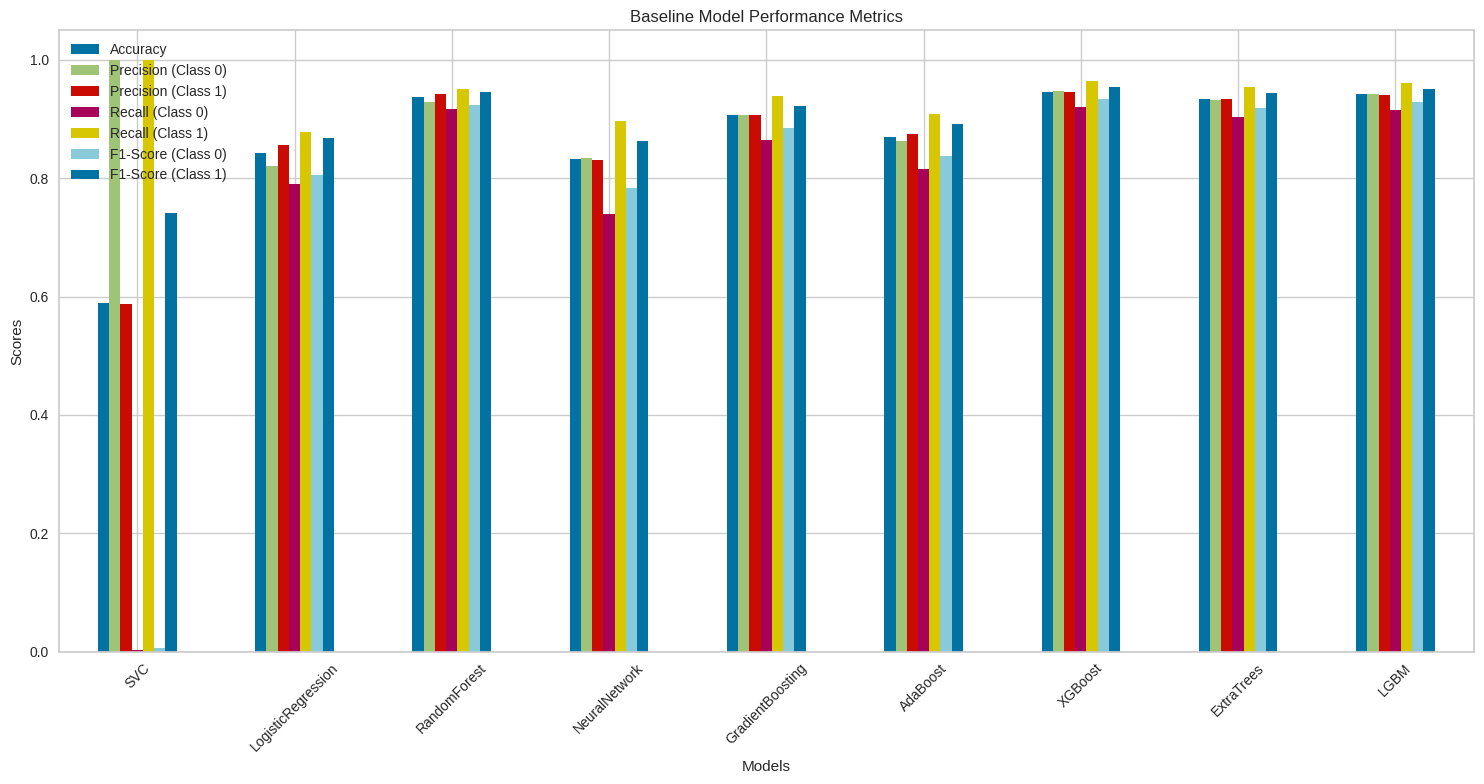

In [197]:
# Plot results
baseline_df.plot(kind='bar', figsize=(15, 8))
plt.title('Baseline Model Performance Metrics')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [198]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Evaluating SVC...
********************************************************


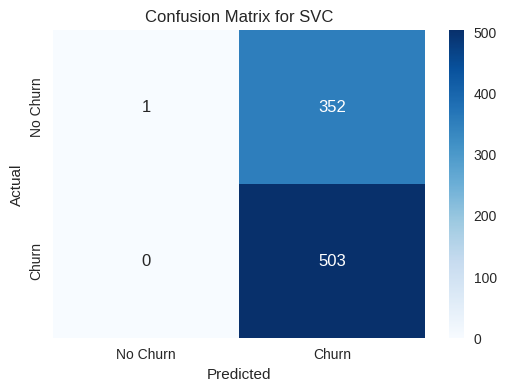


Evaluating LogisticRegression...
********************************************************


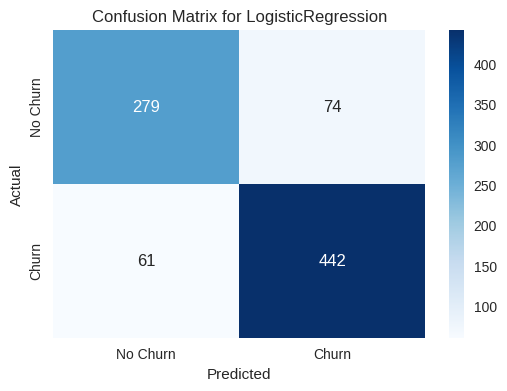


Evaluating RandomForest...
********************************************************


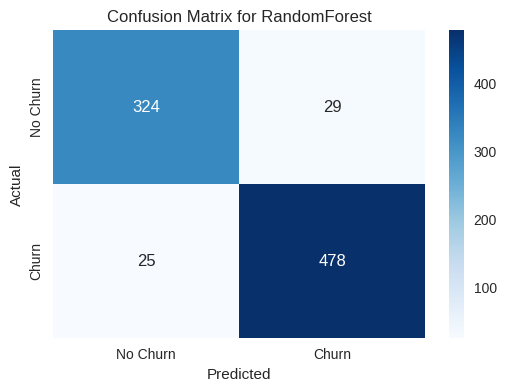


Evaluating NeuralNetwork...
********************************************************


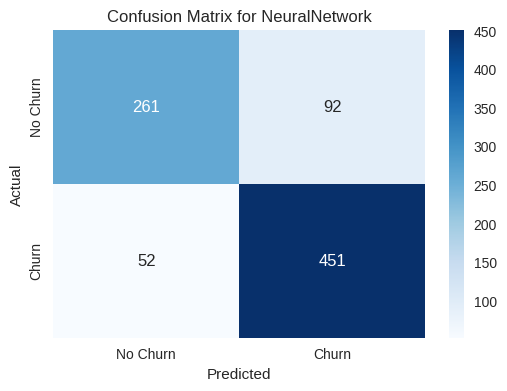


Evaluating GradientBoosting...
********************************************************


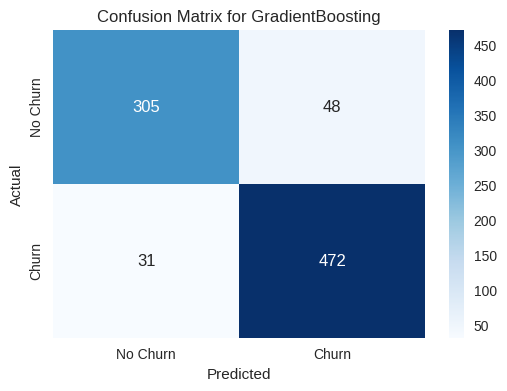


Evaluating AdaBoost...
********************************************************


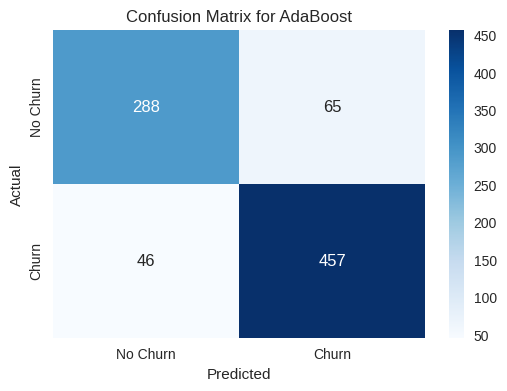


Evaluating XGBoost...
********************************************************


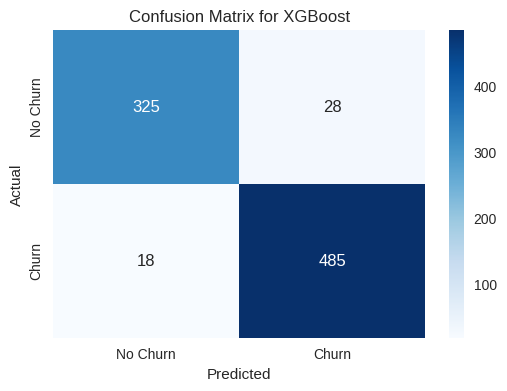


Evaluating ExtraTrees...
********************************************************


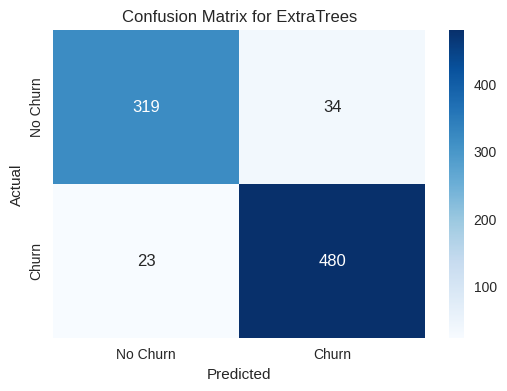


Evaluating LGBM...
********************************************************


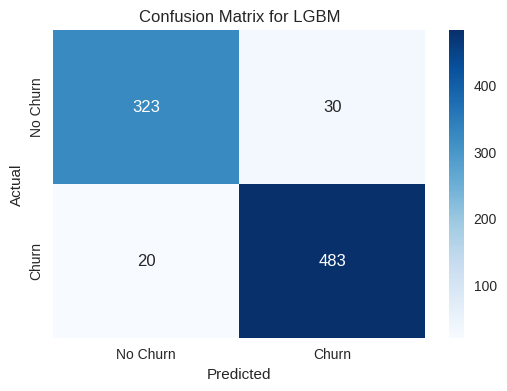

In [199]:
# Generate confusion matrices
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)
    print("********************************************************")
    plot_confusion_matrix(y_test, y_pred, name)

We have used the Wilcoxonsigned-rank test is used to determine
 if there is a significant difference in the predictive power of GBM
 compared to each of the other models when applied to the same churn
 prediction task.

In [200]:
from scipy.stats import wilcoxon

# Perform Wilcoxon signed-rank test using cross-validation results
def cross_val_metrics(model, X, y, metric_function):
    scores = cross_val_score(model, X, y, scoring=metric_function, cv=10)
    return scores

print("\nStatistical Comparison Using Wilcoxon Signed-Rank Test:\n")
metrics = ['accuracy', 'f1_weighted']  # Metrics for cross-validation scoring
model_names = list(models.keys())

# Collect cross-validation scores for all models
cv_scores = {name: {metric: cross_val_metrics(models[name], X, y, metric) for metric in metrics} for name in models}

for i in range(len(model_names)):
    for j in range(i + 1, len(model_names)):
        model_1 = model_names[i]
        model_2 = model_names[j]
        for metric in metrics:
            stat, p = wilcoxon(
                cv_scores[model_1][metric], cv_scores[model_2][metric]
            )
            print(f"{model_1} vs {model_2} ({metric}): p-value = {p:.5f}")
            if p < 0.05:
                print(f"\tSignificant difference found for {metric}!")
            else:
                print(f"\tNo significant difference for {metric}.")



Statistical Comparison Using Wilcoxon Signed-Rank Test:

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 434, number of negative: 2565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 2999, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144715 -> initscore=-1.776669
[LightGBM] [Info] Start training from score -1.776669
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 434, number of negative: 2565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000423 seconds.
You can set `force_row_wise=true` to remove the overhead

In [201]:
param_grids = {
    'SVC': {
        'model': SVC(),
        'params': {'C': [1, 10, 100]}  # Focused range around the best C (100)
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.1, 1, 10]}  # Narrowed range around the best C (1)
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'max_depth': [18, 20, 22],  # Reduced range around the best max_depth (20)
            'n_estimators': [15, 20, 25]  # Focused range around the best n_estimators (20)
        }
    },
    'NeuralNetwork': {
        'model': MLPClassifier(max_iter=1000),
        'params': {
            'hidden_layer_sizes': [(8,), (9,), (10,)],  # Around the best size (9)
            'activation': ['relu'],  # Fixed at the best option
            'solver': ['adam']  # Fixed at the best option
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'max_depth': [5, 10, 15],  # Reduced range
            'min_samples_leaf': [5, 8, 10],  # Reduced range
            'max_leaf_nodes': [3, 5, 7]  # Reduced range
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [200, 250, 300],  # Around the best n_estimators (250)
            'learning_rate': [0.1, 0.3, 0.5]  # Around the best learning_rate (0.3)
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [800, 1000, 1200],  # Around the best n_estimators (1000)
            'learning_rate': [0.05, 0.1, 0.2]  # Around the best learning_rate (0.1)
        }
    }
}


In [202]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV

# Enable MLflow autologging
mlflow.autolog()

# Placeholder to store results
best_models = {}

# Set up MLflow experiment (optional)
mlflow.set_experiment("Models Grid Search")

# Perform Grid Search for each model
for name, config in param_grids.items():
    with mlflow.start_run(run_name=name):  # Start a new run for each model
        print(f"Starting Grid Search for {name}...")

        # Grid Search
        grid_search = GridSearchCV(estimator=config['model'], param_grid=config['params'],
                                   scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)  # Replace with your dataset

        # Extract and save the best estimator
        best_models[name] = grid_search.best_estimator_

        print(f"Best params for {name}: {grid_search.best_params_}\n")

# Display all best models
print("Best Models and Hyperparameters:")
for model_name, model in best_models.items():
    print(f"{model_name}: {model}")


2024/12/11 12:40:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2024/12/11 12:40:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/11 12:40:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/11 12:40:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/12/11 12:40:59 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2024/12/11 12:40:59 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


Starting Grid Search for SVC...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


2024/12/11 12:41:33 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


Best params for SVC: {'C': 100}

Starting Grid Search for LogisticRegression...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


2024/12/11 12:41:57 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


Best params for LogisticRegression: {'C': 10}

Starting Grid Search for RandomForest...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


2024/12/11 12:42:18 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.


Best params for RandomForest: {'max_depth': 20, 'n_estimators': 25}

Starting Grid Search for NeuralNetwork...
Fitting 10 folds for each of 3 candidates, totalling 30 fits


2024/12/11 12:43:07 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.


Best params for NeuralNetwork: {'activation': 'relu', 'hidden_layer_sizes': (10,), 'solver': 'adam'}

Starting Grid Search for GradientBoosting...
Fitting 10 folds for each of 27 candidates, totalling 270 fits


2024/12/11 12:46:51 INFO mlflow.sklearn.utils: Logging the 5 best runs, 22 runs will be omitted.


Best params for GradientBoosting: {'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 10}

Starting Grid Search for AdaBoost...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


2024/12/11 12:48:53 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.


Best params for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 300}

Starting Grid Search for XGBoost...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


2024/12/11 12:50:39 INFO mlflow.sklearn.utils: Logging the 5 best runs, 4 runs will be omitted.


Best params for XGBoost: {'learning_rate': 0.2, 'n_estimators': 1000}

Best Models and Hyperparameters:
SVC: SVC(C=100)
LogisticRegression: LogisticRegression(C=10, max_iter=1000)
RandomForest: RandomForestClassifier(max_depth=20, n_estimators=25)
NeuralNetwork: MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
GradientBoosting: GradientBoostingClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=10)
AdaBoost: AdaBoostClassifier(learning_rate=0.5, n_estimators=300)
XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_del

In [203]:
from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2e35pYpLFBysNdfIHfLgVBD9DhV_7oEV9nZcx3SXnRqRfQuty"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://753b-34-19-109-217.ngrok-free.app


In [210]:
!mlflow ui --host 0.0.0.0 --port 5000 &


[2024-12-11 12:55:04 +0000] [15379] [INFO] Starting gunicorn 23.0.0
[2024-12-11 12:55:04 +0000] [15379] [INFO] Listening at: http://0.0.0.0:5000 (15379)
[2024-12-11 12:55:04 +0000] [15379] [INFO] Using worker: sync
[2024-12-11 12:55:04 +0000] [15384] [INFO] Booting worker with pid: 15384
[2024-12-11 12:55:04 +0000] [15385] [INFO] Booting worker with pid: 15385
[2024-12-11 12:55:04 +0000] [15386] [INFO] Booting worker with pid: 15386
[2024-12-11 12:55:05 +0000] [15387] [INFO] Booting worker with pid: 15387
[2024-12-11 13:20:38 +0000] [15379] [INFO] Handling signal: int
[2024-12-11 13:20:38 +0000] [15386] [INFO] Worker exiting (pid: 15386)
[2024-12-11 13:20:38 +0000] [15384] [INFO] Worker exiting (pid: 15384)
[2024-12-11 13:20:38 +0000] [15385] [INFO] Worker exiting (pid: 15385)
[2024-12-11 13:20:38 +0000] [15387] [INFO] Worker exiting (pid: 15387)
[2024-12-11 13:20:39 +0000] [15379] [INFO] Shutting down: Master



Evaluating SVC...
********************************************************
Accuracy: 0.8049065420560748
Precision: 0.7968197879858657
Recall: 0.8966202783300199
F1 Score: 0.8437792329279701
ROC-AUC: 0.7854206207514123
********************************************************


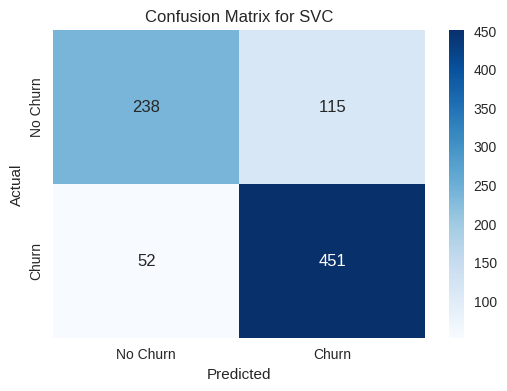


Evaluating LogisticRegression...
********************************************************
Accuracy: 0.8411214953271028
Precision: 0.8576998050682261
Recall: 0.8747514910536779
F1 Score: 0.8661417322834646
ROC-AUC: 0.833976312099077
********************************************************


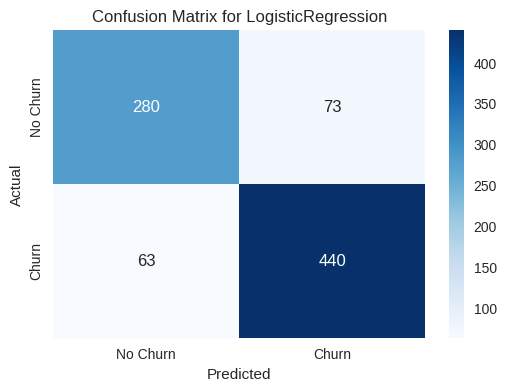


Evaluating RandomForest...
********************************************************
Accuracy: 0.9252336448598131
Precision: 0.9262135922330097
Recall: 0.94831013916501
F1 Score: 0.93713163064833
ROC-AUC: 0.9203307069762727
********************************************************


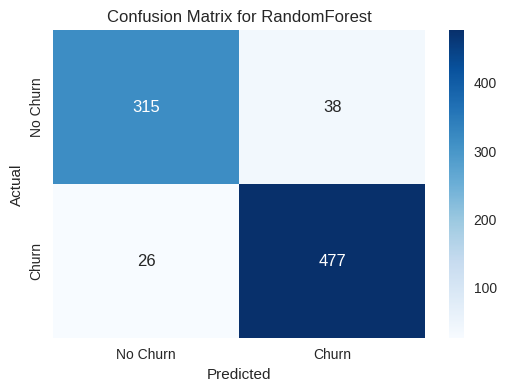


Evaluating NeuralNetwork...
********************************************************
Accuracy: 0.7827102803738317
Precision: 0.821501014198783
Recall: 0.805168986083499
F1 Score: 0.8132530120481928
ROC-AUC: 0.7779386006904747
********************************************************


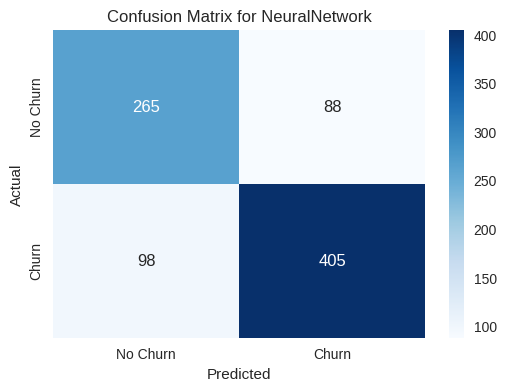


Evaluating GradientBoosting...
********************************************************
Accuracy: 0.9100467289719626
Precision: 0.9096153846153846
Recall: 0.9403578528827038
F1 Score: 0.9247311827956989
ROC-AUC: 0.9036066884810119
********************************************************


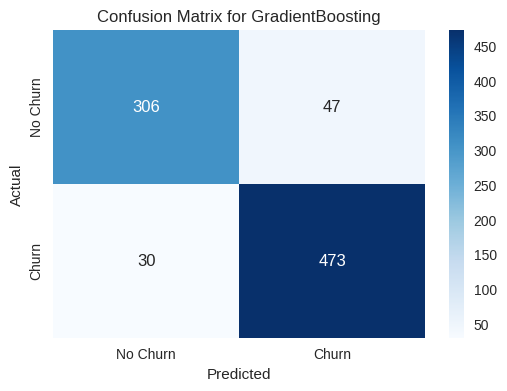


Evaluating AdaBoost...
********************************************************
Accuracy: 0.8656542056074766
Precision: 0.875968992248062
Recall: 0.8986083499005965
F1 Score: 0.887144259077527
ROC-AUC: 0.8586526168766438
********************************************************


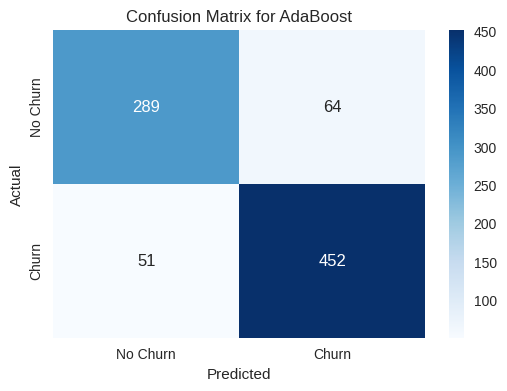


Evaluating XGBoost...
********************************************************
Accuracy: 0.9415887850467289
Precision: 0.9364161849710982
Recall: 0.9662027833001988
F1 Score: 0.9510763209393346
ROC-AUC: 0.9363591820183714
********************************************************


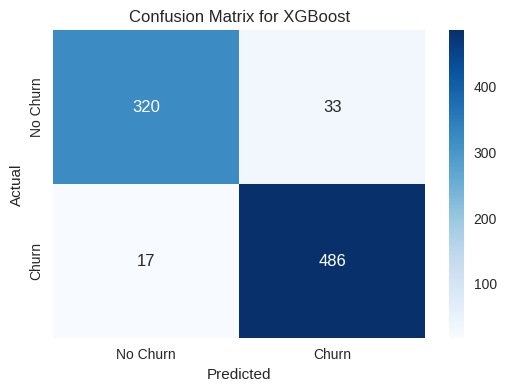

In [212]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score




# Generate confusion matrices
for model_name, model in best_models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)
    print("********************************************************")
    # Evaluate metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")
    print("********************************************************")

    plot_confusion_matrix(y_test, y_pred, model_name)


In [207]:
data.columns

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn', 'International plan_Yes',
       'Voice mail plan_Yes', 'Region_Northeast', 'Region_South',
       'Region_West'],
      dtype='object')

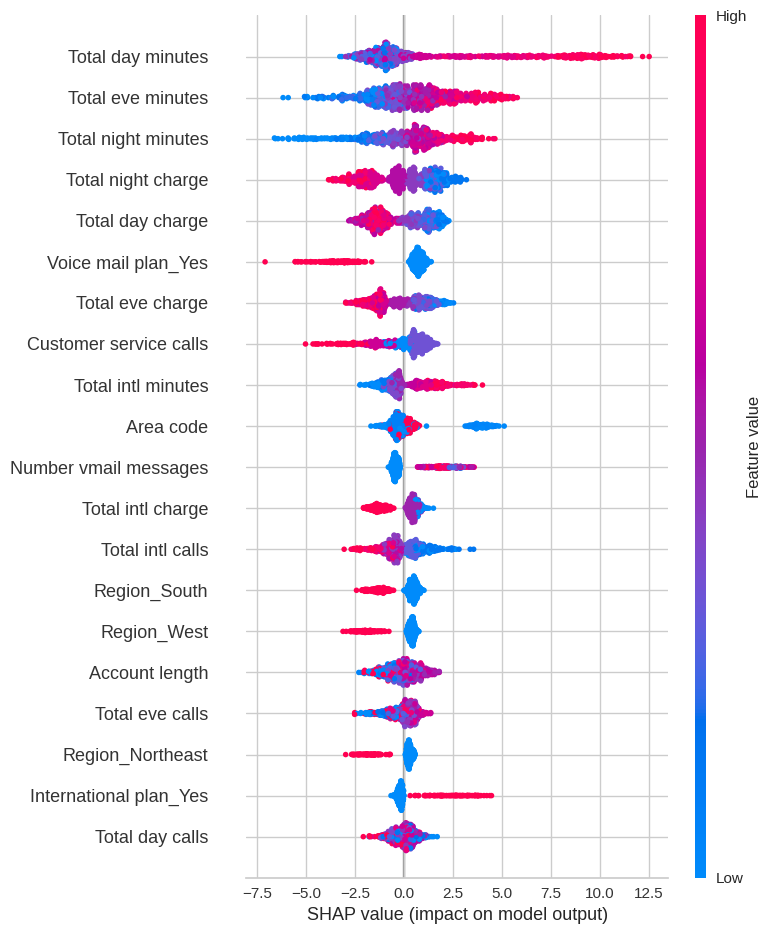

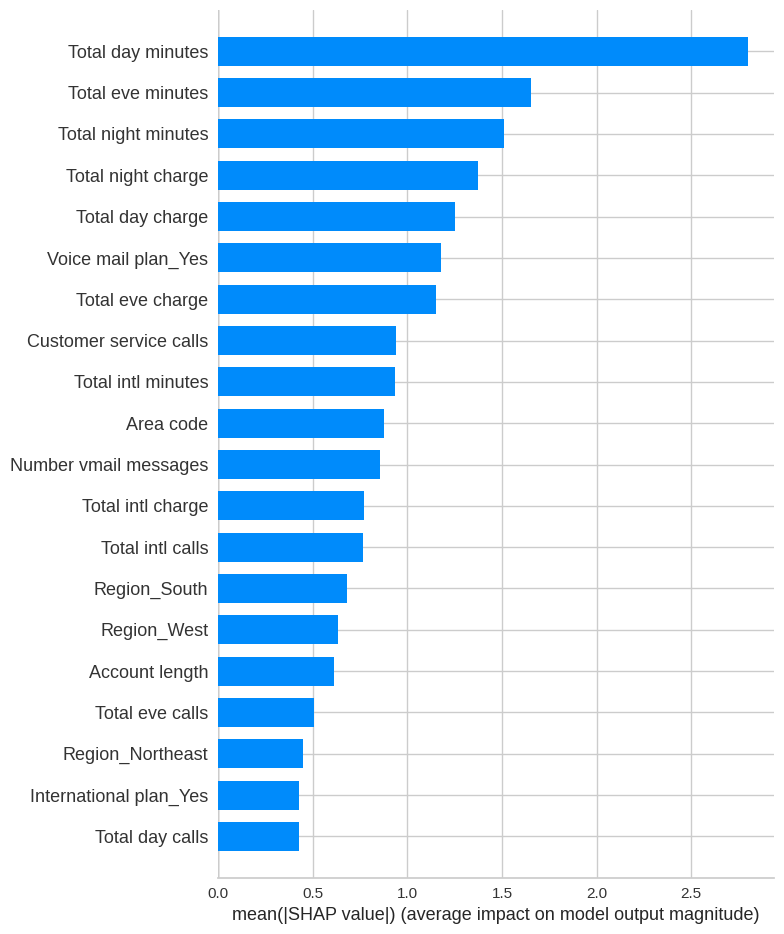

In [214]:
import shap

# Assuming model and X_test are already defined
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot with feature names
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Beeswarm plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")


### Deep Learning

### LSTM

In [216]:
# Import necessary libraries
import tensorflow as tf

model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], 1), activation="tanh",
                         return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(64, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.LSTM(2, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(1, activation="sigmoid")])

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)

model_lstm.summary()

2024/12/11 13:22:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/12/11 13:22:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 21, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 21, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 21, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 21, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 21, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 2)                   │             536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,531 (584.11 KB)

 Trainable params: 149,531 (584.11 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
history_lstm = model_lstm.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

2024/12/11 13:22:50 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '427617440dca4c0aba2e9e00f5c74c85', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/12/11 13:22:50 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.
2024/12/11 13:22:50 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'DataFrame' object has no attribute 'flatten'


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6132 - loss: 0.9087

54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 142ms/step - accuracy: 0.6136 - loss: 0.9077 - val_accuracy: 0.5876 - val_loss: 0.7945
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6168 - loss: 0.7663

54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.6171 - loss: 0.7659 - val_accuracy: 0.5876 - val_loss: 0.7329
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.6373 - loss: 0.7011

54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 235ms/step - accuracy: 0.6374 - loss: 0.7009 - val_accuracy: 0.5900 - val_loss: 0.7038
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6253 - loss: 0.6864

54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 138ms/step - accuracy: 0.6256 - loss: 0.6862 - val_accuracy: 0.6098 - val_loss: 0.6928
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.6506 - loss: 0.6660

54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 186ms/step - accuracy: 0.6507 - loss: 0.6659 - val_accuracy: 0.6203 - val_loss: 0.6871
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6532 - loss: 0.6571

54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.6532 - loss: 0.6571 - val_accuracy: 0.6075 - val_loss: 0.6808
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.6671 - loss: 0.6520 - val_accuracy: 0.6086 - val_loss: 0.6832
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6652 - loss: 0.6494

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.6651 - loss: 0.6495 - val_accuracy: 0.6051 - val_loss: 0.6801
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6474 - loss: 0.6560

54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.6476 - loss: 0.6559 - val_accuracy: 0.6133 - val_loss: 0.6771
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - accuracy: 0.6566 - loss: 0.6542 - val_accuracy: 0.6121 - val_loss: 0.6780
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.6664 - loss: 0.6456

54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.6662 - loss: 0.6457 - val_accuracy: 0.6145 - val_loss: 0.6751
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.6495 - loss: 0.6541 - val_accuracy: 0.6145 - val_loss: 0.6753
Epoch 13/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6624 - loss: 0.6452

54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - accuracy: 0.6624 - loss: 0.6452 - val_accuracy: 0.6133 - val_loss: 0.6717
Epoch 14/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.6486 - loss: 0.6538 - val_accuracy: 0.6168 - val_loss: 0.6734
Epoch 15/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6567 - loss: 0.6495

54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.6568 - loss: 0.6494 - val_accuracy: 0.6098 - val_loss: 0.6676
Epoch 16/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.6465 - loss: 0.6551 - val_accuracy: 0.6180 - val_loss: 0.6767
Epoch 17/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6610 - loss: 0.6443

54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.6610 - loss: 0.6442 - val_accuracy: 0.6145 - val_loss: 0.6660
Epoch 18/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.6543 - loss: 0.6464 - val_accuracy: 0.5923 - val_loss: 0.6958
Epoch 19/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.6609 - loss: 0.6417 - val_accuracy: 0.6086 - val_loss: 0.6770
Epoch 20/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6486 - loss: 0.6531

54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.6489 - loss: 0.6528 - val_accuracy: 0.6238 - val_loss: 0.6605
Epoch 21/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6639 - loss: 0.6347

54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.6641 - loss: 0.6346 - val_accuracy: 0.6507 - val_loss: 0.6421
Epoch 22/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.6644 - loss: 0.6452 - val_accuracy: 0.6215 - val_loss: 0.6704
Epoch 23/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 114ms/step - accuracy: 0.6526 - loss: 0.6384 - val_accuracy: 0.6133 - val_loss: 0.6715
Epoch 24/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.6772 - loss: 0.6261 - val_accuracy: 0.6110 - val_loss: 0.6592
Epoch 25/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6604 - loss: 0.6303

54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.6605 - loss: 0.6302 - val_accuracy: 0.6542 - val_loss: 0.6271
Epoch 26/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6605 - loss: 0.6152

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.6607 - loss: 0.6152 - val_accuracy: 0.6636 - val_loss: 0.6058
Epoch 27/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6869 - loss: 0.5865

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.6868 - loss: 0.5865 - val_accuracy: 0.6659 - val_loss: 0.5830
Epoch 28/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.6836 - loss: 0.5761 - val_accuracy: 0.6857 - val_loss: 0.5934
Epoch 29/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6880 - loss: 0.5687

54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.6882 - loss: 0.5685 - val_accuracy: 0.7325 - val_loss: 0.5323
Epoch 30/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.7055 - loss: 0.5814 - val_accuracy: 0.6659 - val_loss: 0.6008
Epoch 31/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.7005 - loss: 0.5563 - val_accuracy: 0.6764 - val_loss: 0.5880
Epoch 32/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.7194 - loss: 0.5401 - val_accuracy: 0.6904 - val_loss: 0.5686
Epoch 33/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.7246 - loss: 0.5245 - val_accuracy: 0.6694 - val_loss: 0.5798
Epoch 34/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.7428 - loss: 0.5007 - val_accuracy: 0.6857 - val_loss: 0.5784
Epoch 35/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7539 - loss: 0.5145

54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - accuracy: 0.7540 - loss: 0.5144 - val_accuracy: 0.7629 - val_loss: 0.5000
Epoch 36/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - accuracy: 0.7644 - loss: 0.4863 - val_accuracy: 0.7617 - val_loss: 0.5176
Epoch 37/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7725 - loss: 0.4775

54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.7724 - loss: 0.4774 - val_accuracy: 0.7921 - val_loss: 0.4667
Epoch 38/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.7843 - loss: 0.4623 - val_accuracy: 0.7734 - val_loss: 0.4741
Epoch 39/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.7715 - loss: 0.4674 - val_accuracy: 0.7348 - val_loss: 0.5319
Epoch 40/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7682 - loss: 0.4800 - val_accuracy: 0.7582 - val_loss: 0.4682
Epoch 41/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 219ms/step - accuracy: 0.7817 - loss: 0.4569 - val_accuracy: 0.7710 - val_loss: 0.5328
Epoch 42/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7644 - loss: 0.5011

54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - accuracy: 0.7647 - loss: 0.5007 - val_accuracy: 0.7850 - val_loss: 0.4536
Epoch 43/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7963 - loss: 0.4515

54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.7962 - loss: 0.4515 - val_accuracy: 0.7745 - val_loss: 0.4522
Epoch 44/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7980 - loss: 0.4387

54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.7978 - loss: 0.4389 - val_accuracy: 0.7850 - val_loss: 0.4447
Epoch 45/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.7760 - loss: 0.4555 - val_accuracy: 0.7932 - val_loss: 0.4452
Epoch 46/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8020 - loss: 0.4340

54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - accuracy: 0.8020 - loss: 0.4340 - val_accuracy: 0.8096 - val_loss: 0.4289
Epoch 47/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.8089 - loss: 0.4242 - val_accuracy: 0.7944 - val_loss: 0.4410
Epoch 48/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.8149 - loss: 0.4254

54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - accuracy: 0.8147 - loss: 0.4255 - val_accuracy: 0.8049 - val_loss: 0.4220
Epoch 49/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.8097 - loss: 0.4194 - val_accuracy: 0.7886 - val_loss: 0.4854
Epoch 50/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.8131 - loss: 0.4205 - val_accuracy: 0.7196 - val_loss: 0.5035
Epoch 51/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8166 - loss: 0.4243

54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.8165 - loss: 0.4243 - val_accuracy: 0.8154 - val_loss: 0.4126
Epoch 52/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8027 - loss: 0.4185

54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.8027 - loss: 0.4185 - val_accuracy: 0.8189 - val_loss: 0.3991
Epoch 53/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8135 - loss: 0.4202 - val_accuracy: 0.8189 - val_loss: 0.4177
Epoch 54/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.8216 - loss: 0.4026 - val_accuracy: 0.7231 - val_loss: 0.5759
Epoch 55/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.7679 - loss: 0.4760 - val_accuracy: 0.8061 - val_loss: 0.4195
Epoch 56/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - accuracy: 0.8337 - loss: 0.3961 - val_accuracy: 0.8084 - val_loss: 0.4136
Epoch 57/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8117 - loss: 0.4021 

54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.8117 - loss: 0.4021 - val_accuracy: 0.8154 - val_loss: 0.3947
Epoch 58/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.8250 - loss: 0.4079 - val_accuracy: 0.8072 - val_loss: 0.4197
Epoch 59/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8116 - loss: 0.4107

54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 148ms/step - accuracy: 0.8118 - loss: 0.4105 - val_accuracy: 0.8353 - val_loss: 0.3818
Epoch 60/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8345 - loss: 0.3744

54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.8343 - loss: 0.3747 - val_accuracy: 0.8271 - val_loss: 0.3769
Epoch 61/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.8357 - loss: 0.3682 - val_accuracy: 0.8084 - val_loss: 0.4091
Epoch 62/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.8256 - loss: 0.3918 - val_accuracy: 0.8189 - val_loss: 0.4309
Epoch 63/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.8250 - loss: 0.3881 - val_accuracy: 0.8294 - val_loss: 0.3776
Epoch 64/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.8368 - loss: 0.3550 - val_accuracy: 0.7944 - val_loss: 0.4448
Epoch 65/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.8033 - loss: 0.4321 - val_accuracy: 0.8224 - val_loss: 0.4201
Epoch 66/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8318 - loss: 0.3810

54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - accuracy: 0.8320 - loss: 0.3809 - val_accuracy: 0.8435 - val_loss: 0.3567
Epoch 67/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.8566 - loss: 0.3562 - val_accuracy: 0.8400 - val_loss: 0.3601
Epoch 68/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.8535 - loss: 0.3518 - val_accuracy: 0.8481 - val_loss: 0.3640
Epoch 69/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.8467 - loss: 0.3500 - val_accuracy: 0.8423 - val_loss: 0.3745
Epoch 70/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8484 - loss: 0.3804

54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - accuracy: 0.8483 - loss: 0.3804 - val_accuracy: 0.8505 - val_loss: 0.3471
Epoch 71/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8556 - loss: 0.3531

54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8557 - loss: 0.3529 - val_accuracy: 0.8516 - val_loss: 0.3413
Epoch 72/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.8680 - loss: 0.3125 - val_accuracy: 0.8166 - val_loss: 0.3916
Epoch 73/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8317 - loss: 0.3805 - val_accuracy: 0.8586 - val_loss: 0.3481
Epoch 74/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.8681 - loss: 0.3422 - val_accuracy: 0.8318 - val_loss: 0.3680
Epoch 75/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.8733 - loss: 0.3236 - val_accuracy: 0.8376 - val_loss: 0.3747
Epoch 76/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.8599 - loss: 0.3331 - val_accuracy: 0.8563 - val_loss: 0.3638
Epoch 77/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.8669 - loss: 0.3199 - val_accuracy: 0.8341 - val_loss: 0.3612
Epoch 78/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8673 - loss: 0.3475

54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.8674 - loss: 0.3472 - val_accuracy: 0.8797 - val_loss: 0.3245
Epoch 79/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8861 - loss: 0.3004

54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.8860 - loss: 0.3005 - val_accuracy: 0.8937 - val_loss: 0.2989
Epoch 80/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.8782 - loss: 0.3101 - val_accuracy: 0.8680 - val_loss: 0.3193
Epoch 81/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.8895 - loss: 0.2831 - val_accuracy: 0.8645 - val_loss: 0.3107
Epoch 82/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.8867 - loss: 0.2810 - val_accuracy: 0.8446 - val_loss: 0.3561
Epoch 83/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.8788 - loss: 0.3103 - val_accuracy: 0.8341 - val_loss: 0.4160
Epoch 84/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.8833 - loss: 0.3004 - val_accuracy: 0.8703 - val_loss: 0.3191
Epoch 85/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.9072 - loss: 0.2710 - val_accuracy: 0.8657 - val_loss: 0.3407
Epoch 86/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.8999 - loss: 0.2593 - val_accur

54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.8977 - loss: 0.2865 - val_accuracy: 0.8902 - val_loss: 0.2885
Epoch 88/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.9074 - loss: 0.2468 - val_accuracy: 0.8773 - val_loss: 0.2920
Epoch 89/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.9070 - loss: 0.2514 - val_accuracy: 0.8703 - val_loss: 0.3180
Epoch 90/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.8951 - loss: 0.2730 - val_accuracy: 0.8773 - val_loss: 0.3077
Epoch 91/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - accuracy: 0.9086 - loss: 0.2500 - val_accuracy: 0.8832 - val_loss: 0.3029
Epoch 92/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9038 - loss: 0.2520

54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.9038 - loss: 0.2520 - val_accuracy: 0.9136 - val_loss: 0.2547
Epoch 93/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 132ms/step - accuracy: 0.9159 - loss: 0.2256 - val_accuracy: 0.8867 - val_loss: 0.3075
Epoch 94/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.8990 - loss: 0.2729 - val_accuracy: 0.8960 - val_loss: 0.2904
Epoch 95/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - accuracy: 0.9064 - loss: 0.2409 - val_accuracy: 0.8621 - val_loss: 0.2841
Epoch 96/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.9018 - loss: 0.2558 - val_accuracy: 0.9054 - val_loss: 0.2559
Epoch 97/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.9335 - loss: 0.2094 - val_accuracy: 0.8727 - val_loss: 0.3458
Epoch 98/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.9089 - loss: 0.2341 - val_accuracy: 0.8984 - val_loss: 0.2960
Epoch 99/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.9193 - loss: 0.2242 - val_accu

54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9127 - loss: 0.2340 - val_accuracy: 0.8984 - val_loss: 0.2506


2024/12/11 13:38:55 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/12/11 13:38:55 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/12/11 13:39:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [218]:
loss_and_metrics = model_lstm.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9063 - loss: 0.2337
[0.2506101429462433, 0.8983644843101501]
Loss =  0.2506101429462433
Accuracy =  0.8983644843101501


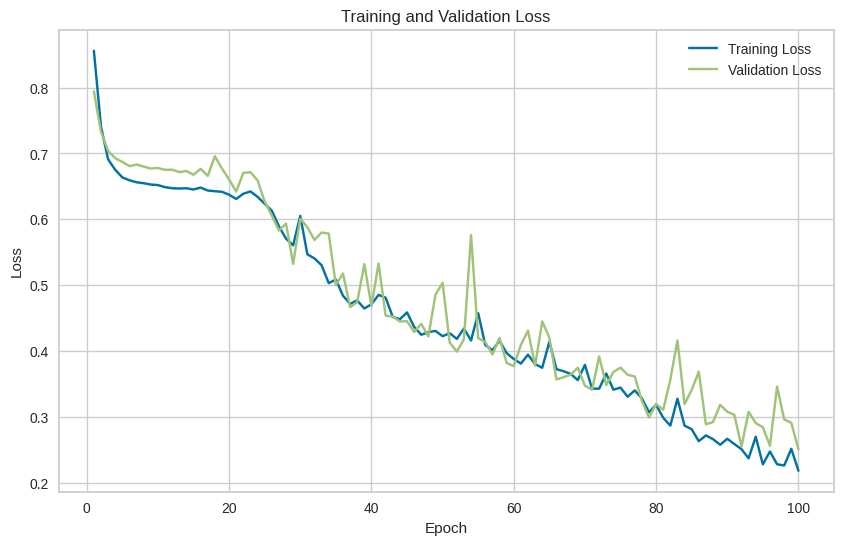

In [221]:
plt.figure(figsize=(10, 6))

train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [219]:
predicted = model_lstm.predict(X_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step


In [222]:
predicted[:10]


array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

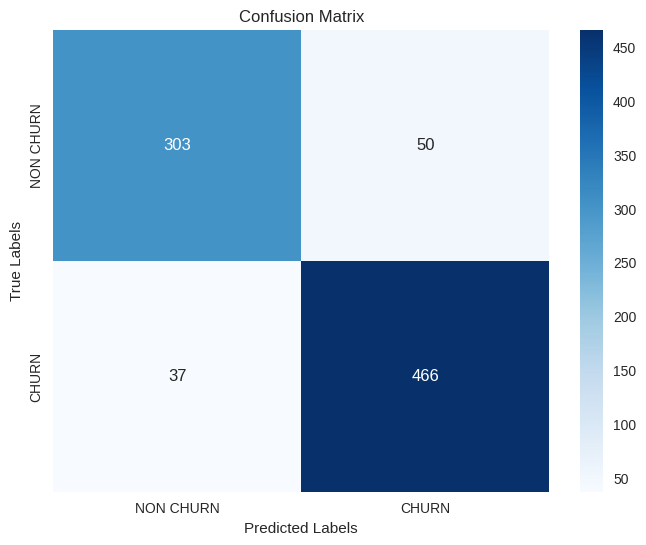

In [220]:
cm = confusion_matrix(y_test, predicted)

class_labels = ['NON CHURN', 'CHURN']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()